# <center>LP2 Time Series</center>

## <center><i>SanFancisco Team</i></center>

## Time Series Analysis & Forecasting

- This is a time series analysis & forecasting problem. In this project, we shalll predict store sales on data from Corporation Favorita, a large Ecuadorian-based grocery retailer.

- Specifically, we are to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.

- The training data includes dates, store, and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models

## 1. Installation & Importation of important Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima

#### The lines of code above are Python import statements. Here's a brief explanation of what each line does:

1. <b>import numpy as np</b>: Imports the NumPy library, which provides support for numerical operations in Python. 

2. <b>import pandas as pd</b>: Imports the pandas library, which provides data structures and tools for data manipulation and analysis. 

3. <b>from datetime import datetime as dt</b>: Imports the datetime class from the datetime module. This will be used for working with dates and times in Python.

4. <b>from statsmodels.tsa.stattools import adfuller, acf, pacf</b>: Imports several statistical functions from the statsmodels library, which is a Python module for statistical modeling and analysis. The adfuller function is used for testing the stationarity of a time series, while acf and pacf are used for analyzing autocorrelation and partial autocorrelation in time series data.

5. <b>from statsmodels.tsa.arima_model import ARIMA</b>: Imports the ARIMA class from the statsmodels library. This class is used for building and fitting ARIMA models, which are a type of time series model used for forecasting future values based on past observations.

6. <b>import math</b>: Imports the math module, which provides mathematical functions and constants in Python.

7. <b>import matplotlib.pyplot as plt</b>: Imports the pyplot module from the matplotlib library, which is a Python plotting library used for data visualization. 

8. <b>%matplotlib inline</b>: This is a special command for Jupyter notebooks, which tells Jupyter to display matplotlib plots directly in the notebook output.

9. <b>import warnings</b>: Imports the warnings module, which provides a way to control the display of warning messages in Python.

10. <b>warnings.filterwarnings('ignore')</b>: Sets the warning filter to ignore warnings, which suppresses warning messages that may appear during the execution of the program. This is sometimes used to avoid cluttering the output with warnings that may not be important for the current analysis.

11. <b>from statsmodels.graphics.tsaplots import plot_pacf, plot_acf</b>: Imports the plot_pacf and plot_acf functions from the tsaplots submodule of the statsmodels.graphics library. These functions are used for visualizing autocorrelation and partial autocorrelation plots of time series data.

12. <b>from statsmodels.tsa.ar_model import AutoReg</b>: Imports the AutoReg class from the ar_model submodule of the statsmodels.tsa library. This class is another way to fit an AR model to time series data.

13. <b>from pmdarima import auto_arima</b>: Imports the auto_arima function from the pmdarima library, which is a Python module for automatically selecting the best ARIMA model for a given time series. This function uses a heuristic approach to find the best parameters for an ARIMA model based on the data.

## 2. Data Loading and Understanding
Here is the section to load all the datasets need for this project

We shall also:
- get a basic understanding of its structure and format. 
- identify the variables and their types.
- identify missing values and checking for data quality issues. 

In [2]:
df_holidays = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\holidays_events.csv')
df_oil = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\oil.csv')
df_stores = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\stores.csv')
df_transactions = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\transactions.csv')
df_train = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\train.csv')
df_test = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\test.csv')
df_smp_submission = pd.read_csv(r'C:\Users\Jaroya\Desktop\data_analytics\env\LP2\store_sales\sample_submission.csv')

### [A] df_train DataFrame
This dataframe contains features and the label to predict sales,that is, the number of sales each day


In [3]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


Below are the columns of the df_train DataFrame:
- id – the index of the row
- date – the current date
- store_nbr – the store
- family – the product family
- sales – number of sales in this family
- onpromotion – the number of products on promotion in this family


In [4]:
# The shape of the df_train dataframe, i.e. the number of rows and columns
df_train.shape

(3000888, 6)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
# Check for missing values in df_train
missing_values = df_train.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [7]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
store_nbr,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
sales,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


### [B] df_holidays DataFrame
- The national holidays are grouped in df_holidays dataframe. This data is not provided by the store but may have an impact on sales.

- On a holiday, for example, there may be more people in the city and thus more customers in the stores. Alternatively, more people may go on vacation, resulting in fewer customers in stores.

In [8]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Below are the columns of the df_holidays DataFrame:
- date – the date of the holiday
- type – the type of holiday (i.e. <i><b>Holiday, Event, Transfer, Additional, Bridge, Work Day</b></i>)
- locale – the magnitude of the event, whether <i><b>Local, Regional or National</b></i>
- locale_name – the city where the event took place
- description – name of the event
- transferred – whether the event was transferred/moved to another day or not

In [9]:
# The shape of the df_holidays dataframe, i.e. the number of rows and columns
df_holidays.shape

(350, 6)

In [10]:
# Check for missing values in df_holidays
missing_values = df_holidays.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


### [C] df_stores DataFrame
The df_stores dataframe holds information of various Corporation Favorita stores.

In [11]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


The df_stores DataFrame columns:
- store_nbr – the store number
- city – the city where the store is located
- state – the state where the store is located
- type – the type of the store
- cluster – the number of similar stores in that area

In [12]:
# The shape of the df_stores dataframe, i.e. the number of rows and columns
df_stores.shape

(54, 5)

In [13]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [14]:
# Check for missing values in df_stores
missing_values = df_stores.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


### [D] df_oil DataFrame
The df_oil dataframe holds the daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

In [15]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


The df_oil DataFrame columns:
- date - the date of the oil price
- dcoilwtico - the price of oil on that particular day

In [16]:
# The shape of the df_oil dataframe, i.e. the number of rows and columns
df_oil.shape

(1218, 2)

In [17]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [18]:
# Check for missing values in df_oil
missing_values_oil = df_oil.isnull().sum()

# Print the number of missing values in each column
print(missing_values_oil)

date           0
dcoilwtico    43
dtype: int64


### [E] df_transactions DataFrame
The df_transactions dataframe groups the daily transactions by stores.

(this is a transaction <b>receipt</b> created after a customer’s purchase)

In [19]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


The df_transactions DataFrame columns:
- date - date when sales were made
- store_nbr - the store where sales were made that day
- transactions - the number of transactions that day

In [20]:
# The shape of the df_transactions dataframe, i.e. the number of rows and columns
df_transactions.shape

(83488, 3)

In [21]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [22]:
# Check for missing values in df_transactions
missing_values_trans = df_transactions.isnull().sum()

# Print the number of missing values in each column
print(missing_values_trans)

date            0
store_nbr       0
transactions    0
dtype: int64


### [F] df_test DataFrame
- The df_test dataframe will allow us to forecast the sale column. 
- The dataframe contains information from August 16, 2017 to August 31, 2017

In [23]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


Below are the columns of the df_test DataFrame:
- id – the index of the row
- date – the current date
- store_nbr – the store
- family – the product family
- onpromotion – the number of products on promotion in this family

In [24]:
# The shape of the df_test dataframe, i.e. the number of rows and columns
df_test.shape

(28512, 5)

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [26]:
# Check for missing values in df_test
missing_values_test = df_test.isnull().sum()

# Print the number of missing values in each column
print(missing_values_test)

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


### [G] df_smp_submission DataFrame
The sample submission dataframe (df_smp_submission) can be used to fill in the number of sales per day and per family

In [27]:
df_smp_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


Below are the columns of the df_smp_submission DataFrame:
- id – the index of the row
- sales – the number of sales in that family

In [28]:
# The shape of the df_smp_submission dataframe, i.e. the number of rows and columns
df_smp_submission.shape

(28512, 2)

In [29]:
df_smp_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [30]:
# Check for missing values in df_smp_submission
missing_values = df_smp_submission.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

id       0
sales    0
dtype: int64


## 3. Univariate Analysis
Here we shall explore stationarity, trend, and seasonality in time series of various datasets so as to understand the patterns and properties of a single variable over time.

### Explore stationarity, trend, and seasonality in df_train dataset:

In [31]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [32]:
# Change the 'date' column from str type to datetime

df_train['date'] = pd.to_datetime(df_train['date'])

# Set the 'date' column as the index of the DataFrame
df_train.set_index('date', inplace=True)

In [33]:
df_train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [34]:
# Create a new data frame from 'df_train'  with 'date' column set as index
df_train_series = df_train.copy()
df_train_series['Year'] = df_train.index.year
df_train_series['Month'] = df_train.index.month
df_train_series['Weekday Name'] = df_train.index.day_name()

In [35]:
df_train_series.head()

,id,store_nbr,family,sales,onpromotion,Year,Month,Weekday Name
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,Tuesday
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,Tuesday
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,Tuesday
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,Tuesday
2013-01-01,4,1,BOOKS,0.0,0,2013,1,Tuesday


In [36]:
# Display random samples of 5 rows
df_train_series.sample(5, random_state=0)

,id,store_nbr,family,sales,onpromotion,Year,Month,Weekday Name
date,,,,,,,,
2014-02-28,752075,11,BREAD/BAKERY,450.0,0,2014,2,Friday
2016-11-16,2517272,39,SEAFOOD,8.0,1,2016,11,Wednesday
2016-11-29,2540112,30,BEVERAGES,1422.0,40,2016,11,Tuesday
2016-08-31,2379367,20,BABY CARE,1.0,0,2016,8,Wednesday
2014-01-30,700715,2,PET SUPPLIES,8.0,0,2014,1,Thursday


In [37]:
df_train_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   Year          int64  
 6   Month         int64  
 7   Weekday Name  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 206.1+ MB


### Trend stationarity:
To test for trend stationarity in our time series data, we shall use the Augmented Dickey-Fuller (ADF) test. 
- The ADF test is the commonly used statistical test for testing the presence of a unit root in a time series, which is an indication of non-stationarity due to a trend.

The steps to follow:
1. Calculate the rolling mean and standard deviation of the sales data
2. Plot the rolling mean and standard deviation to visualize the trend
3. Perform the ADF test on the sales data

In [38]:
#Calculate the rolling mean and standard deviation of the sales data
rolling_mean = df_train_series['sales'].rolling(window=12).mean()
rolling_std = df_train_series['sales'].rolling(window=12).std()

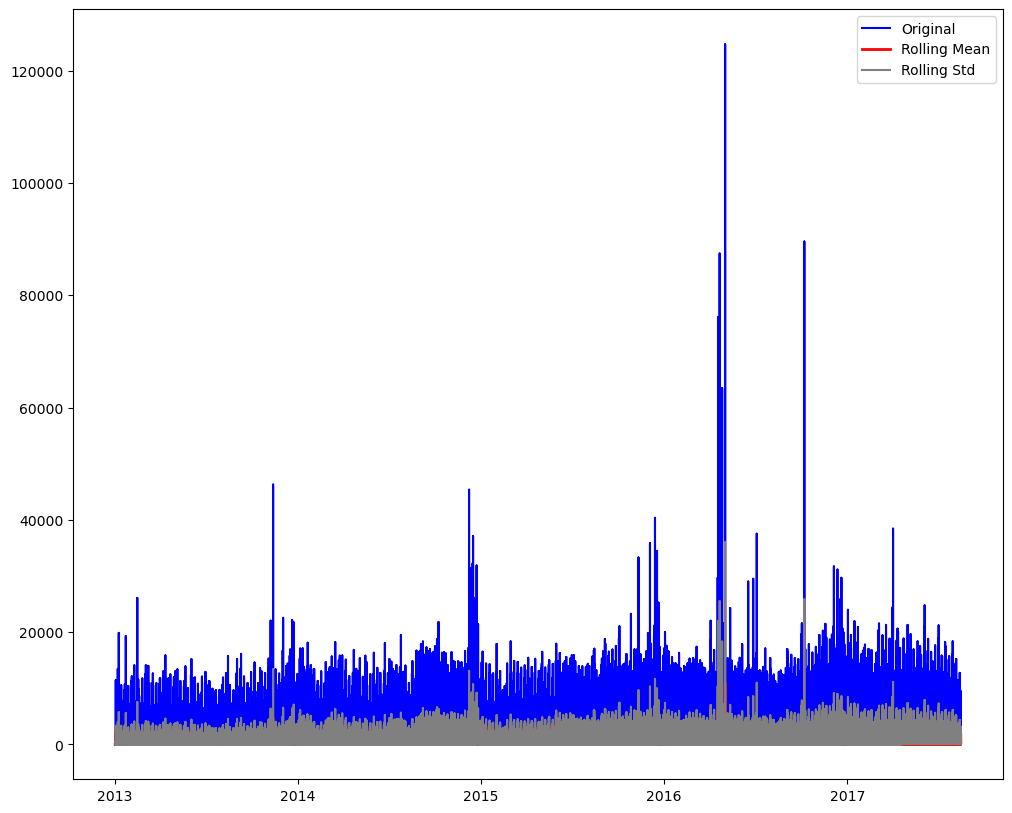

In [39]:
# Plot the rolling mean and standard deviation to visualize the trend
plt.figure(figsize=(12,10))
plt.plot(df_train_series['sales'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', linewidth=2, label='Rolling Mean')
plt.plot(rolling_std, color='gray', label='Rolling Std')
plt.legend()
plt.show()

From the above plot, it can be visualized that there is seasonality every year with upward spikes at the end of each year.

### Testing Stationarity for the year 2013.

We shall subset the dataframe to only include 2013 period.This is to avoid the system taking too long to produce the output.


In [40]:
# Perform the ADF test on the sales data for 2013 only [TAKES TOO LONG TO RUN]

# result = adfuller(df_train_series.loc[df_train_series['Year'] == 2013, 'sales'])

# result = adfuller(df_train_series['sales'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:', result[4])

### Visualize Seasonality of Sales from 2013 to 2017

Text(0, 0.5, 'Sales')

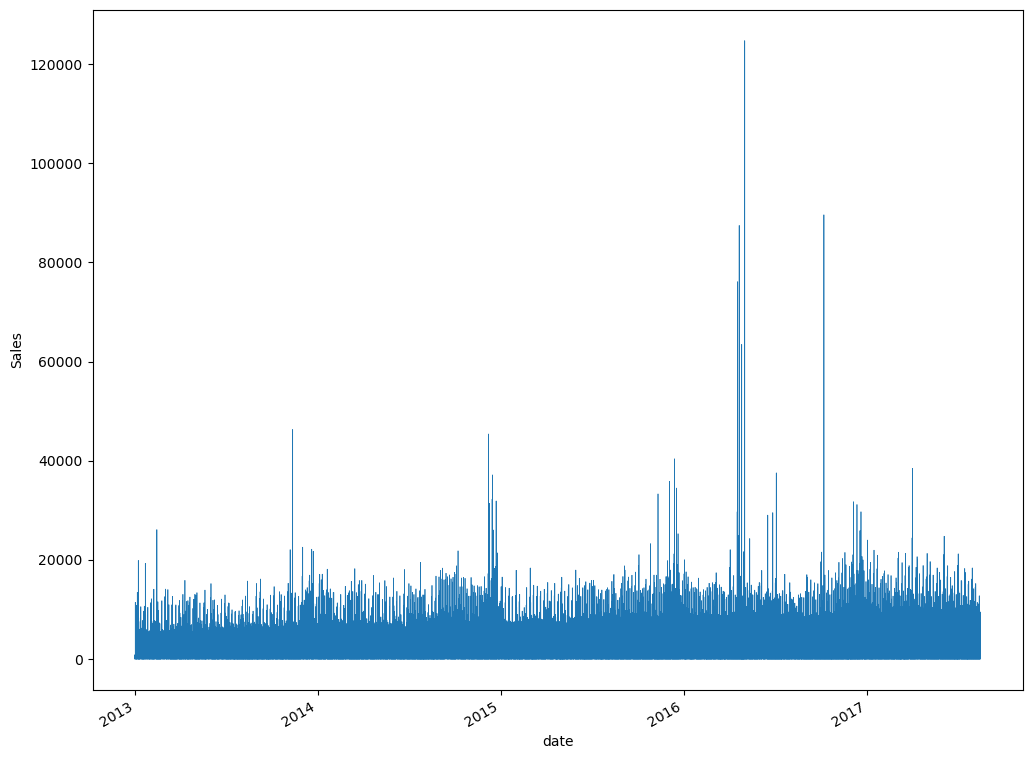

In [41]:
import seaborn as sns
plt.figure(figsize=(12,10))
ax=df_train_series['sales'].plot(linewidth=0.5)
ax.set_ylabel('Sales')

The code creates a simple line plot of the sales values in the df_train_series DataFrame, with a y-axis label indicating the units of the sales values.
- It's not clear to visualize stationarity, trend, or seasonality from the plot.
- We need therefore to explore the data further

### Seasonality:
To test for seasonality between Year and Sales in df_train dataset, we follow the steps below:
- Convert the 'date' column to a datetime datatype
- Create a new column 'Month' which extracts the month from the 'date' column
- Create a pivot table to calculate the average sales for each year and month
- Create a line plot to visualize the trend of average sales over time

In [42]:
df_sales_monthly = df_train_series.pivot_table(index=['Year', 'Month'], values='sales', aggfunc='mean')

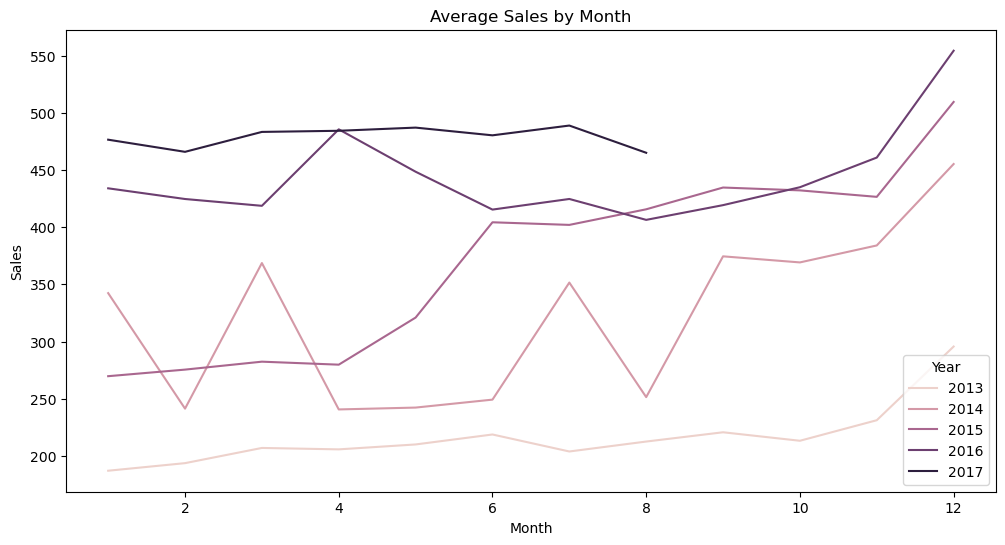

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sales_monthly, x='Month', y='sales', hue='Year')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

The line plot above shows each year's average sales plotted against each month. We can visually inspect the plot to identify any recurring patterns, such as seasonal spikes or dips in sales.
- From the line graph, we can see that there are seasonal spikes particularly from the month of November towards December.

#### Perform autocorrelation analysis to test for seasonality:
- Create a pivot table to calculate the average sales for each month
- Plot the autocorrelation function (ACF) to visualize the correlation between sales in each month and the sales in the previous months
- The lags parameter will specify the number of time periods to include in the ACF plot. In this case, we set lags=12 to show the correlation between each month's sales and the sales in the previous 12 months.

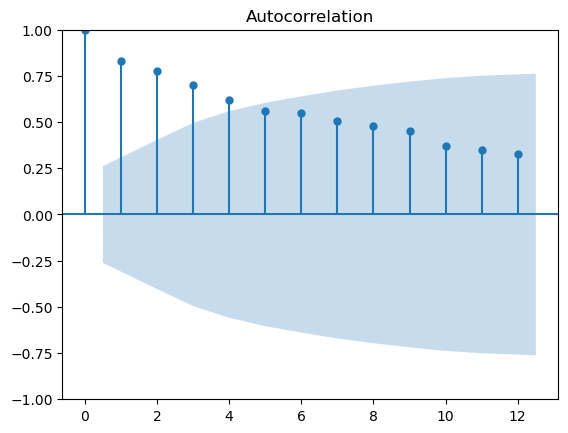

In [44]:
df_sales_monthly = df_train_series.pivot_table(index=pd.Grouper(freq='M'), values='sales', aggfunc='mean')

# Plot the acf
plot_acf(df_sales_monthly, lags=12)
plt.show()

From the Autocorrelation plot, Month 0 = 1 and Month 12 = 0.3, which suggests that there is a seasonal pattern with the highest seasonal effect occurring at Month 0 (December/January) with a value of 1 and the lowest seasonal effect occurring at Month 12 (December/January) with a value of 0.3.

#### Other Univariate Analysis with df_train Dataset

1. <b><u>Descriptive statistics</u></b>: 
    - We can calculate basic descriptive statistics for the sales column using the describe() method, which gives us information such as the mean, standard deviation, minimum and maximum values, and quartiles as shown below:

In [45]:
df_train['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

2. <b><u>Distribution plot</u></b>: 
    - We then plot the distribution of the sales column using a histogram or kernel density plot to visualize the shape of the distribution as shown below:

<AxesSubplot:xlabel='sales', ylabel='Count'>

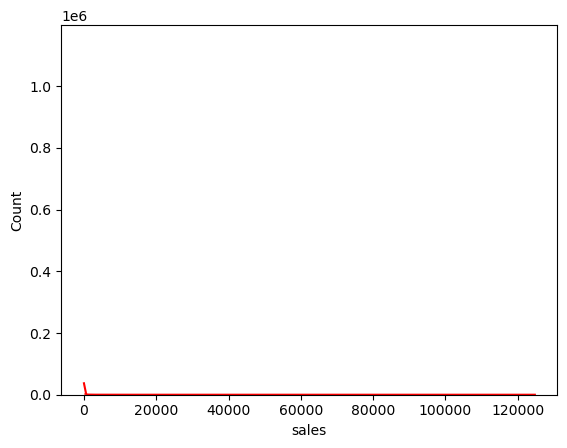

In [46]:
sns.histplot(df_train['sales'], kde=True, color='red')

3. <b><u>Box plot</u></b>: 
    - We use a box plot to visualize the distribution of the sales column and identify any outliers.

<AxesSubplot:xlabel='sales'>

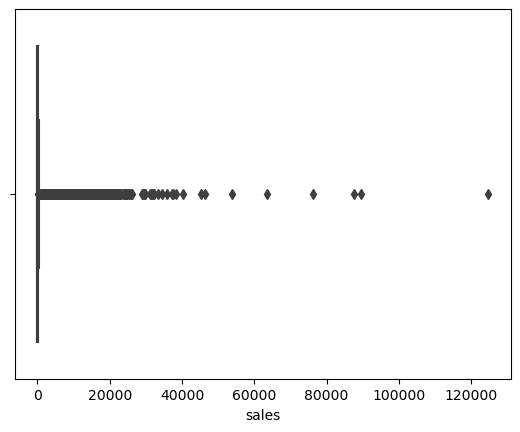

In [47]:
sns.boxplot(x=df_train['sales'])

4. <b><u>Pivot table</u></b>: 
    - We create a pivot table to summarize the sales column by family and onpromotion categories. 

In [48]:
df_train.pivot_table(values='sales', index='family', columns='onpromotion', aggfunc=np.mean)

onpromotion,0,1,2,3,4,5,6,7,8,9,...,702,710,716,717,718,719,720,722,726,741
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,5.853087,12.271947,13.480392,15.923954,18.936170,20.728814,20.428571,21.000000,19.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BABY CARE,0.109624,1.660377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEAUTY,3.078452,8.079021,9.556841,6.837037,9.154762,13.333333,18.250000,18.000000,60.500000,61.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEVERAGES,1292.272591,2254.404076,2567.288278,2950.067889,3080.714092,3054.160355,3086.897638,3098.250751,3157.090766,3103.272506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOOKS,0.070797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BREAD/BAKERY,379.513249,571.228704,619.034227,607.246040,503.749273,455.249505,572.978622,573.550719,544.824325,628.911169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CELEBRATION,7.945922,20.349012,16.182403,13.073394,13.472527,16.494845,22.022727,24.416667,29.614286,36.274510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLEANING,868.378326,1115.941398,1205.951113,1281.500116,1309.117992,1309.311449,1308.548878,1292.648287,1244.160763,1198.416222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAIRY,479.811128,799.902024,901.172355,981.329822,1015.638563,977.295521,924.649492,920.904306,943.722611,819.607961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore stationarity, trend, and seasonality in df_oil dataset:

In [49]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


To perform seasonality analysis on the df_oil dataframe, we shall follow these steps:
1. Make copy of df_oil dataframe
2. Convert the date column to a datetime object using the pd.to_datetime() function
3. Set the date column as the index of the dataframe using the df.set_index() function
4. Resample the dataframe to a monthly frequency using the df.resample() function
5. Plot the monthly oil prices using a line plot

In [50]:
df_oil_copy = df_oil.copy()
df_oil_copy['date'] = pd.to_datetime(df_oil_copy['date'])
df_oil_copy.set_index('date', inplace=True)
df_monthly_oil = df_oil_copy.resample('M').mean()

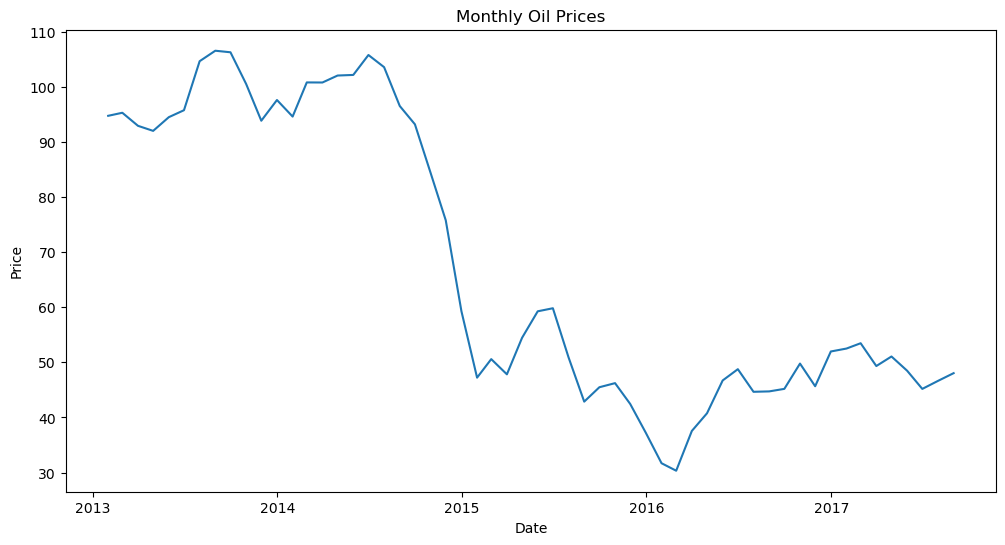

In [51]:
# Visualize the seasonality

plt.figure(figsize=(12,6))
plt.plot(df_monthly_oil['dcoilwtico'])
plt.title('Monthly Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


The above plot shows the monthly oil prices as a line plot with the x-axis representing the dates and the y-axis representing the oil prices.

From the plot, we can see that there was a down trend oil oil prices from 2013 to 2016 and an uptrend from 2016 to 2017.

### Decomposing the time series into its seasonal, trend, and residual components using the seasonal_decompose() function from the statsmodels library:
- This will plot the seasonal, trend, and residual components of the time series. And we shall use the plot to identify the presence and strength of seasonality in the data.

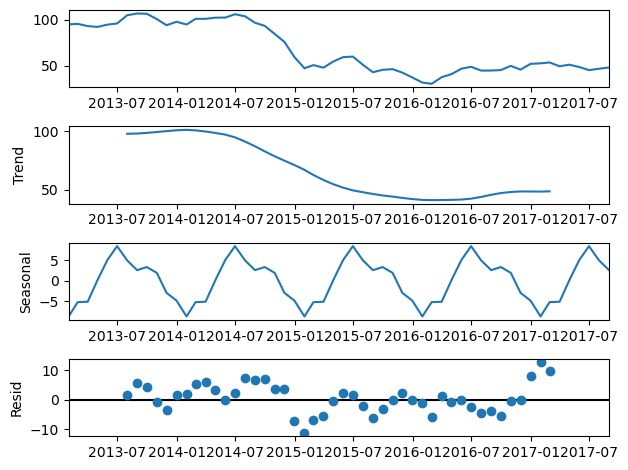

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly_oil, model='additive')
fig = decomposition.plot()
plt.show()

From the above plots:
1. <b>Trend</b>: there is a clear downward trend of oil prices from 2013 to 2016 with a slight upward trend from 2016 to 2017
2. <b>Seasonal</b>: It is clear from the plot that there is a seasonality of oil prices yearly.
3. <b>Resid</b>: The resid component in a seasonal decomposition plot represents the residual variation in the time series that cannot be explained by the seasonal or trend components. It represents the noise or randomness in the data that cannot be attributed to any predictable pattern. In other words, the resid component is the difference between the observed values of the time series and the predicted values based on the seasonal and trend components. 

### Explore stationarity, trend, and seasonality in df_transactions dataset:
To perform seasonality analysis on the df_transactions dataframe, we shall follow these steps:

1. Make copy of df_transactions dataframe
2. Convert the date column to a datetime object using the pd.to_datetime() function
3. Set the date column as the index of the dataframe using the df.set_index() function
4. Resample the dataframe to a monthly frequency using the df.resample() function
5. Plot the monthly oil prices using a line plot

In [53]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [54]:
df_transactions_copy = df_transactions.copy()
df_transactions_copy['date'] = pd.to_datetime(df_transactions_copy['date'])
df_transactions_copy.set_index('date', inplace=True)
df_monthly_transactions = df_transactions_copy.resample('M').mean()

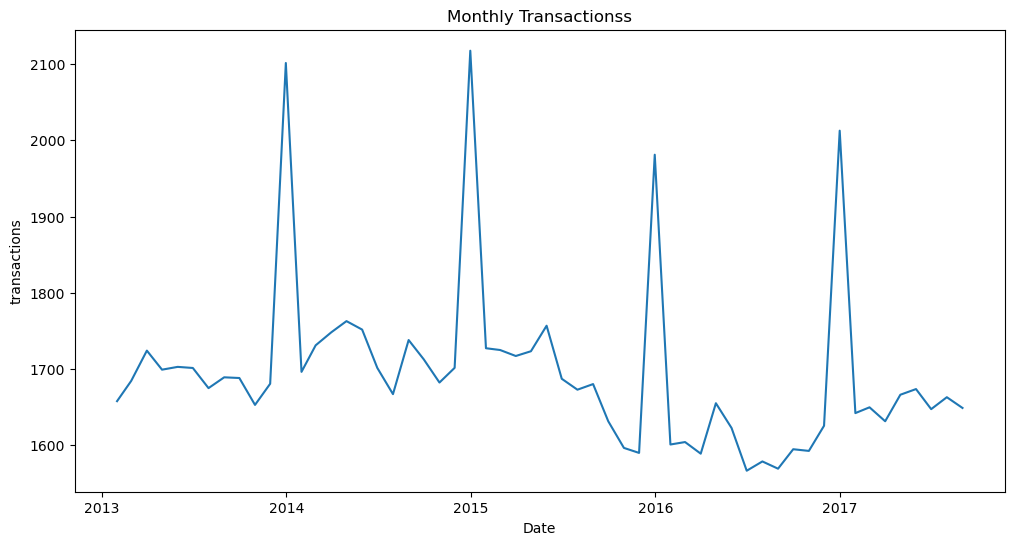

In [55]:
# Visualize the seasonality

plt.figure(figsize=(12,6))
plt.plot(df_monthly_transactions['transactions'])
plt.title('Monthly Transactionss')
plt.xlabel('Date')
plt.ylabel('transactions')
plt.show()

The plot above shows a clear yearly seasonality of transactions with very high spike of transactions occuring at the end of the year (month of December).

### Decomposing the time series into its seasonal, trend, and residual components using the seasonal_decompose() function from the statsmodels library:
- This will plot the seasonal, trend, and residual components of the time series. And we shall use the plot to identify the presence and strength of seasonality in the data.

In [56]:
df_transactions_copy.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


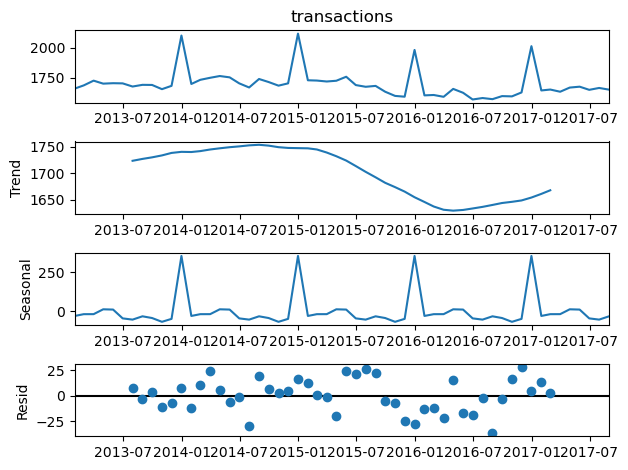

In [57]:
decomposition_tran = seasonal_decompose(df_monthly_transactions['transactions'], model='additive')
fig = decomposition_tran.plot()
plt.show()

From the above plots:
1. <b>Trend</b>: there is a clear upward trend of transactions from 2013 to 2015 and then a downward trend from end of 2015 to 2016 then again an upward trend from 2016 to 2017.
2. <b>Seasonal</b>: It is clear from the plot that there is a seasonality of transactions happening yearly.
3. <b>Resid</b>: The resid component in a seasonal decomposition plot represents the residual variation in the time series that cannot be explained by the seasonal or trend components. It represents the noise or randomness in the data that cannot be attributed to any predictable pattern. In other words, the resid component is the difference between the observed values of the time series and the predicted values based on the seasonal and trend components. 

### 4.	Bivariate and Multivariate Analysis: 
- This stage involves analysing the relationships between pairs or groups of variables to identify patterns and correlations. 
    1. Bivariate analysis will involve comparing two variables, and
    2. Multivariate analysis will involve analysing the relationships between multiple variables simultaneously.


### Bivariate Analysis:
<b> (A) df_train dataframe:</b>
- We can perform a correlation analysis between the sales and onpromotion columns using the corr() function in Pandas as shown below:

In [58]:
df_train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [59]:
#Check the relationship between Sales and promotion
#calculate pearson corr coefficient
corr_coef=df_train["sales"].corr(df_train["onpromotion"],method="pearson")
print(f"Correlation coefficient between sales and promotion is {corr_coef}")

Correlation coefficient between sales and promotion is 0.42792320481212925


1. The correlation coefficient between sales and onpromotion is 0.43, which indicates a moderately positive correlation between the two variables. 
2. This means that there is a tendency for sales to increase as the number of products on promotion in a family increases, but this relationship is not perfect. 
3. A correlation coefficient of 0.43 suggests that the relationship between the two variables is moderately strong, but other factors, such as store location, time of year, and competition, may also influence sales. 

<b>It's important to note that correlation does not imply causation, and further analysis would be needed to determine if there is a causal relationship between sales and the number of products on promotion.</b>

#### 1st. Visualize of correlation

Text(0.5, 0, 'On Promotion')

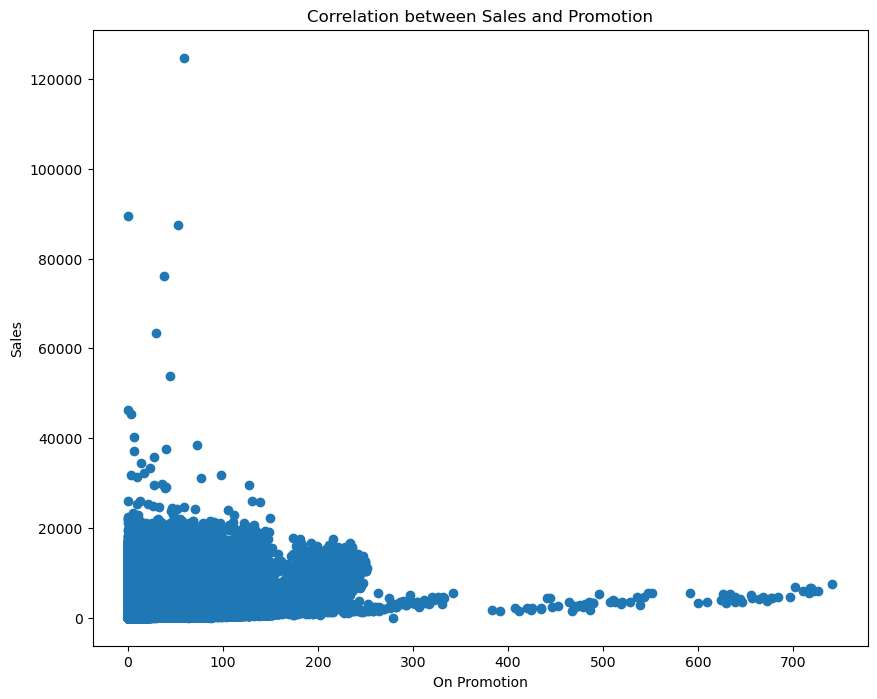

In [60]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(x=df_train["onpromotion"],y=df_train["sales"])
plt.title("Correlation between Sales and Promotion")
plt.ylabel("Sales")
plt.xlabel("On Promotion")

<b>The Graph obviously shows the slightly high correlation between sales and items on promotion
Although high sales were experienced when less items were on promotion.</b> 

#### 2nd. Visualize of correlation

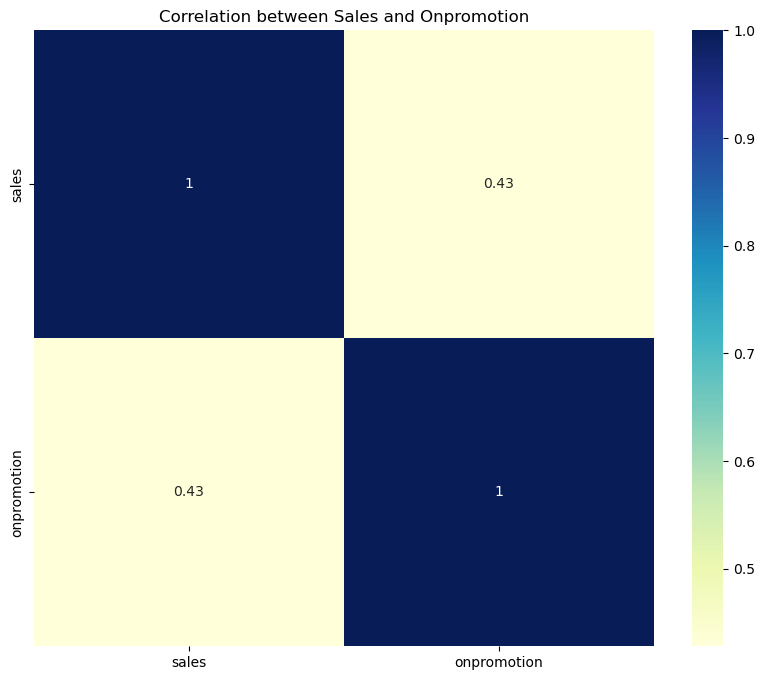

In [61]:
#matplot
df=pd.DataFrame({"sales":df_train["sales"],"onpromotion":df_train["onpromotion"]})
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

# Create a heatmap of the correlation in the df_year_amt
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# add a title to the plot
plt.title('Correlation between Sales and Onpromotion')

# Show the plot
plt.show()

<b>The Heatmap clearly shows the correlation between Sales and Onpromotion as 0.43.</b>

### Bivariate analysis between sales and oil prices

In [62]:
df_train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [65]:
df_train_copy = df_train.copy()

In [66]:
#drop id and reset the index
df_train_copy.drop(columns=["id"]).reset_index(inplace=True)

#convert  date in oil df to a datetime
df_oil["date"]=pd.to_datetime(df_oil["date"])

In [67]:
df_oil_train=pd.merge(df_train_copy,df_oil,on="date",how="left")

In [68]:
df_oil_train.head()

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,NaN
1,2013-01-01,1,1,BABY CARE,0.0,0,NaN
2,2013-01-01,2,1,BEAUTY,0.0,0,NaN
3,2013-01-01,3,1,BEVERAGES,0.0,0,NaN
4,2013-01-01,4,1,BOOKS,0.0,0,NaN


In [69]:
#Create a DataFrame with oil prices and sales
df_oil_sales=pd.DataFrame({"oil_price":df_oil_train["dcoilwtico"],"sales":df_oil_train["sales"]})

#Calculate correlation coefficient
corr_coef=df_oil_sales["sales"].corr(df_oil_sales["oil_price"],method="pearson")

print(f"Correlation coefficient between sales and oil price is {corr_coef}")

Correlation coefficient between sales and oil price is -0.07905016021992874


<b>There is a very weak correlation between oil prices and sales the price of oil on the market has no effect on sales.</b>

### Visualize correlation between Oil sales and promotion

Text(0.5, 0, 'Oil Price')

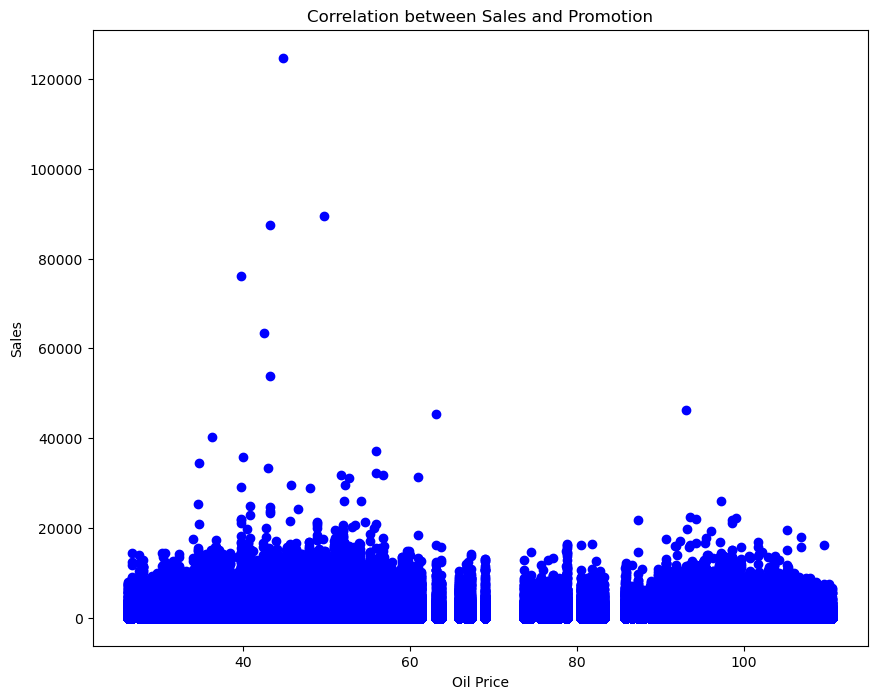

In [70]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(x=df_oil_sales["oil_price"],y=df_oil_sales["sales"],c="b")
plt.title("Correlation between Sales and Promotion")
plt.ylabel("Sales")
plt.xlabel("Oil Price")

<b>The figure clearly demonstrates the weak correlation between oil and sales.</b>

### Visualize the Relationship between Monthly Average Sales and Monthly Average Oil prices Over Time

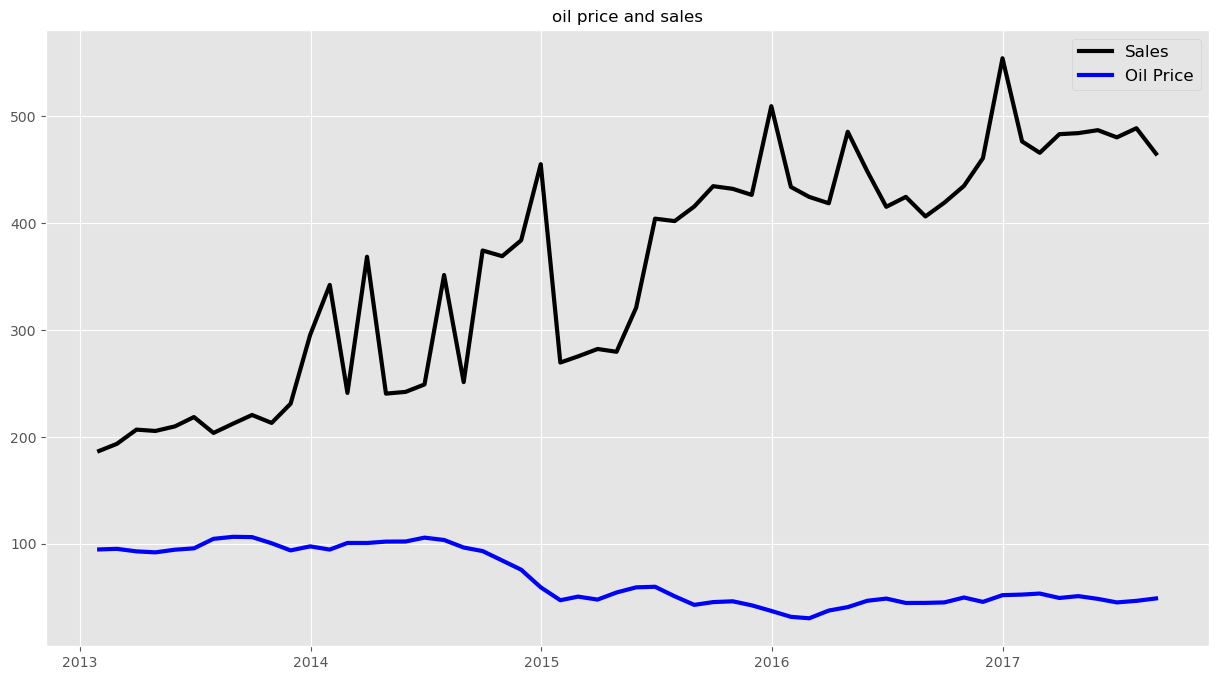

In [71]:
#Rename the dcoilwtico column to oil price
df_oil_train.rename(columns={"dcoilwtico":"oil price"},inplace=True)

#make a copy
df_oil_train_copy=df_oil_train.copy()
#change date to datetime
df_oil_train_copy["date"]=pd.to_datetime(df_oil_train_copy["date"])

#set date as index
df_oil_train_copy.set_index("date",inplace=True)

#Resample
df_oil_train_copy=df_oil_train_copy.resample("M").mean()
#plot sales and oil price on one graph
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(df_oil_train_copy["sales"],c="k",linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],c="b",linewidth=3,label="Oil Price")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

1. The plot shows the relationship between monthly average sales and monthly average oil prices over time. 
2. The x-axis represents the time period in months and the y-axis represents the values for sales and oil prices. 
3. The plot shows two lines, one for sales and the other for oil prices. 
4. The black line represents monthly average sales, and the blue line represents monthly average oil prices. 

<b>The plot helps to visualize any correlation between oil prices and sales. If the two lines move in the same direction over time, it indicates a positive correlation, while if they move in opposite directions, it indicates a negative correlation.</b>

<b><i>We can therefore conclude that there was a Negative correlation between oil prices and sales.</i></b>

### Multivariate Analysis

- We shall pay attention to how oil price, sales and items on promotion are correlated.

- The code below finds the correlation coefficients between the three variables and plots a heatmap of the correlations

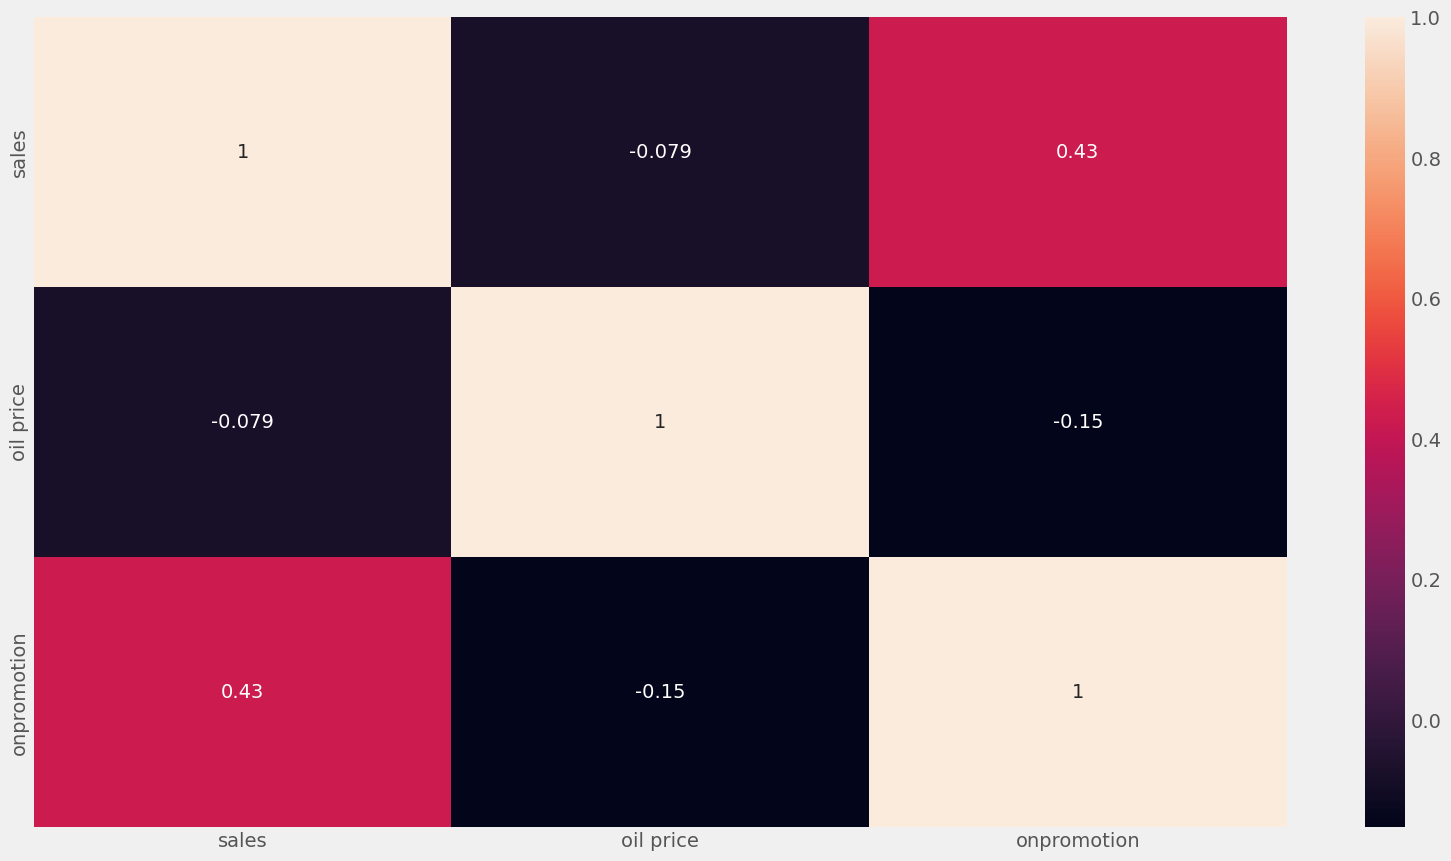

In [72]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,10))
numeric_corr=df_oil_train[["sales","oil price","onpromotion"]].corr()
sns.heatmap(numeric_corr,annot=True);

The heatmap shows the correlation between sales, oil price and items on promotion

### Visualize the Sales, Oil price, and On-promotion Data 

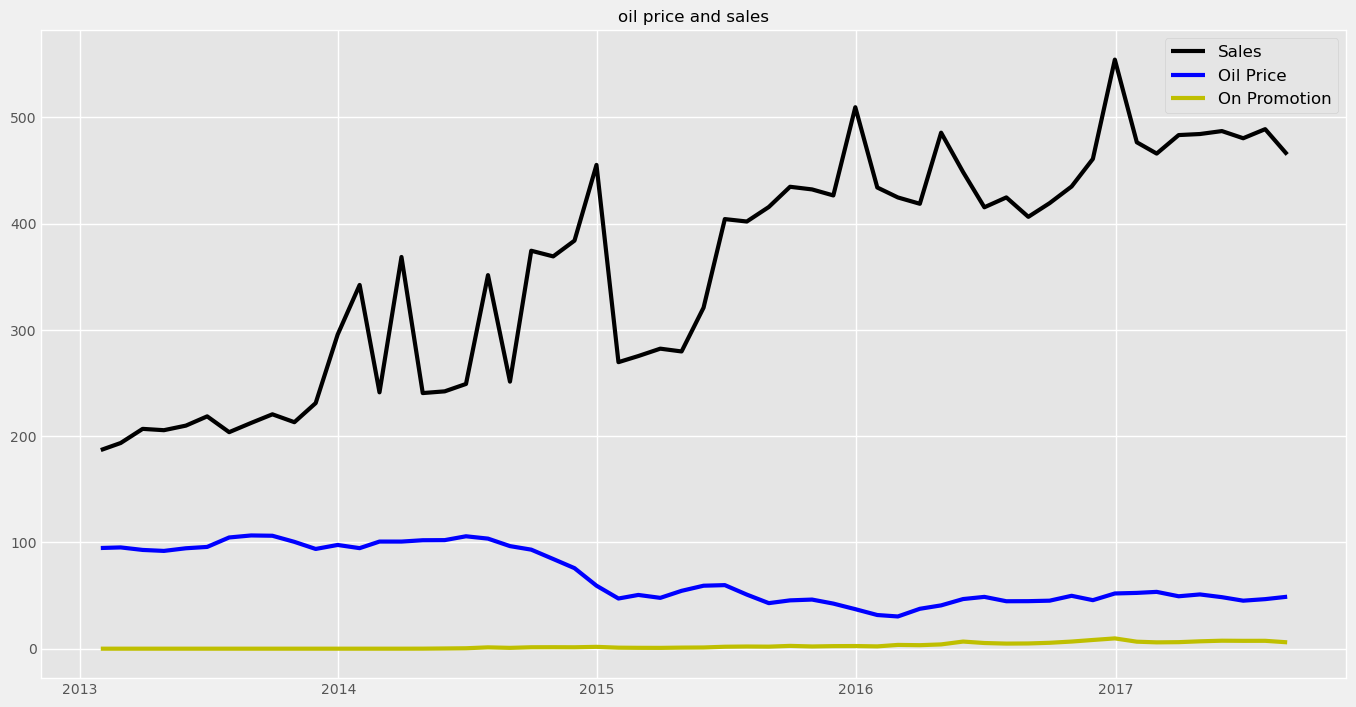

In [73]:
#plot sales and oil price and on promotion on one graph
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(df_oil_train_copy["sales"],c="k",linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],c="b",linewidth=3,label="Oil Price")
plt.plot(df_oil_train_copy["onpromotion"],c="y",linewidth=3,label="On Promotion")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

### Observation

1. Based on the monthly resampling, items on promotion is almost at a zero from 2013 to 2016.

2. However, sales tend to incrase every month within this years.


### Plotting Sales oil price and items on promotion based on the weekly resampling

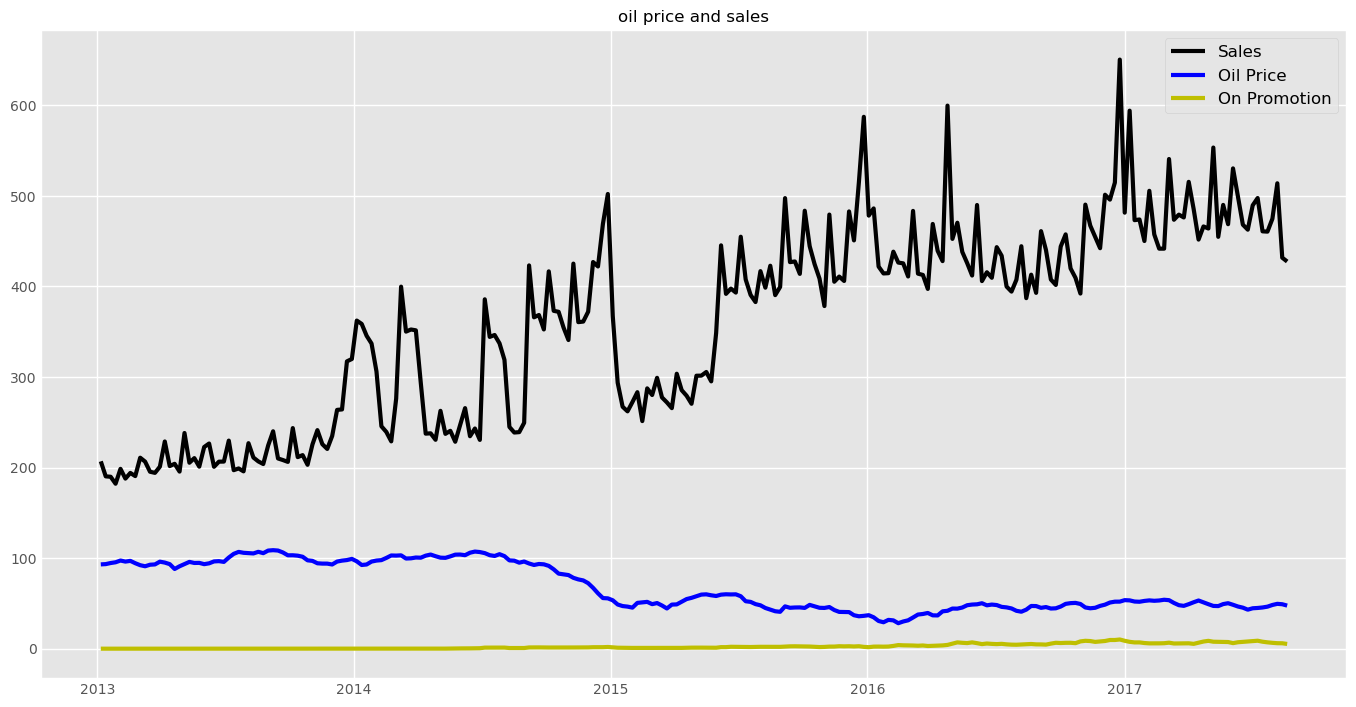

In [74]:
#make a copy
df_oil_train_copy=df_oil_train.copy()

#change date to datetime
df_oil_train_copy["date"]=pd.to_datetime(df_oil_train_copy["date"])

#set date as index
df_oil_train_copy.set_index("date",inplace=True)
#Resample to weekly
df_oil_train_copy=df_oil_train_copy.resample("W").mean()

#plot sales and oil price and on promotion on one graph
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(df_oil_train_copy["sales"],c="k",linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],c="b",linewidth=3,label="Oil Price")
plt.plot(df_oil_train_copy["onpromotion"],c="y",linewidth=3,label="On Promotion")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

<b>Although items on promotion has  slightly stronger correlation(0.43) with sales, it effects on sales is very little.</b>

<b>(C) df_train dataframe:</b>
- Comparison between the sales of different product families across different stores using Heatmap.

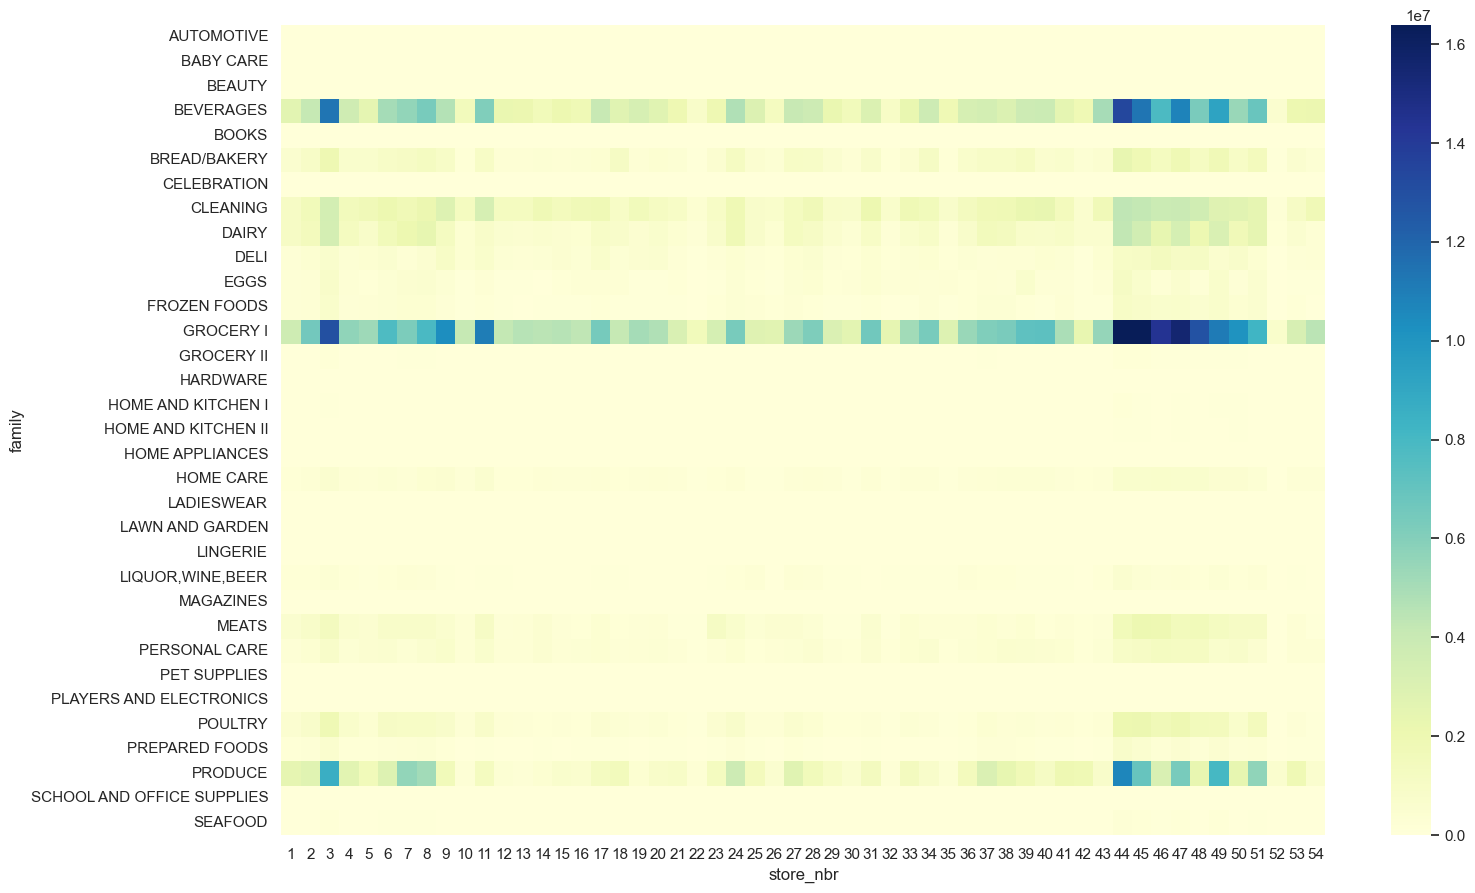

In [75]:
# Create a pivot table that summarizes the total sales for each family and store
sales_by_family_and_store = pd.pivot_table(df_train, values='sales', index=['family'], columns=['store_nbr'], aggfunc='sum')

# Create a heatmap of the sales by family and store
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(sales_by_family_and_store, cmap='YlGnBu')
plt.show()

In the above heatmap, the colors are assigned based on the values in the <b>sales_by_family_and_store</b> dataframe, where yellow represents <u>lower</u> values and blue represents <u>higher</u> values. 
- The range of values for the sales can be seen on the right-hand side of the heatmap, where the color bar shows the values from 0.0 to 1.6.

<b>We can conclude that the stores witnessed a lot of sales in BEVERAGES, GROCERY I and PRODUCE.</b>

### Multivariate Analysis:
<b>(A) Regression Analysis on df_train:</b>
- We shall perform a regression analysis with sales as the dependent variable and onpromotion and store_nbr as independent variables.

STEPS:
1. The sm.OLS function is used to create a linear regression model, where y is the dependent variable and X is the matrix of independent variables. 
2. The add_constant function is used to add a constant term to the independent variables, which is required for the regression analysis. 
3. Finally, the fit method is called to fit the model to the data and obtain the regression results, which are printed using the summary method.

In [76]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = df_train['sales']
X = df_train[['onpromotion', 'store_nbr']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model and print the summary
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                 3.396e+05
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:37:58   Log-Likelihood:            -2.4973e+07
No. Observations:             3000888   AIC:                         4.995e+07
Df Residuals:                 3000885   BIC:                         4.995e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         183.3473      1.171    156.614      

<b>We Can Summarize the above results as follows:</b>
1. The regression analysis shows that the model has a low R-squared value of 0.185, which indicates that only 18.5% of the variation in sales can be explained by the independent variables included in the model. 
2. The F-statistic has a very low probability value, which indicates that the model is statistically significant. 
3. Both the onpromotion and store_nbr variables have a statistically significant relationship with sales, as indicated by their low p-values of 0.000. 
4. The coefficient of onpromotion is 38.5686, indicating that a unit increase in the number of on promotion products is associated with an increase in sales by 38.5686 units, holding store_nbr constant. 
5. Similarly, the coefficient of store_nbr is 2.6925, indicating that a unit increase in the store number is associated with an increase in sales by 2.6925 units, holding onpromotion constant.

<b> (B) df_train:</b>
- Variation diferences between the Relationship of 'onpromotion' and 'sales' across ' product families'

We explore how the relationship between onpromotion and sales varies across different product families by creating a scatter plot of sales against onpromotion for each product family.

<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

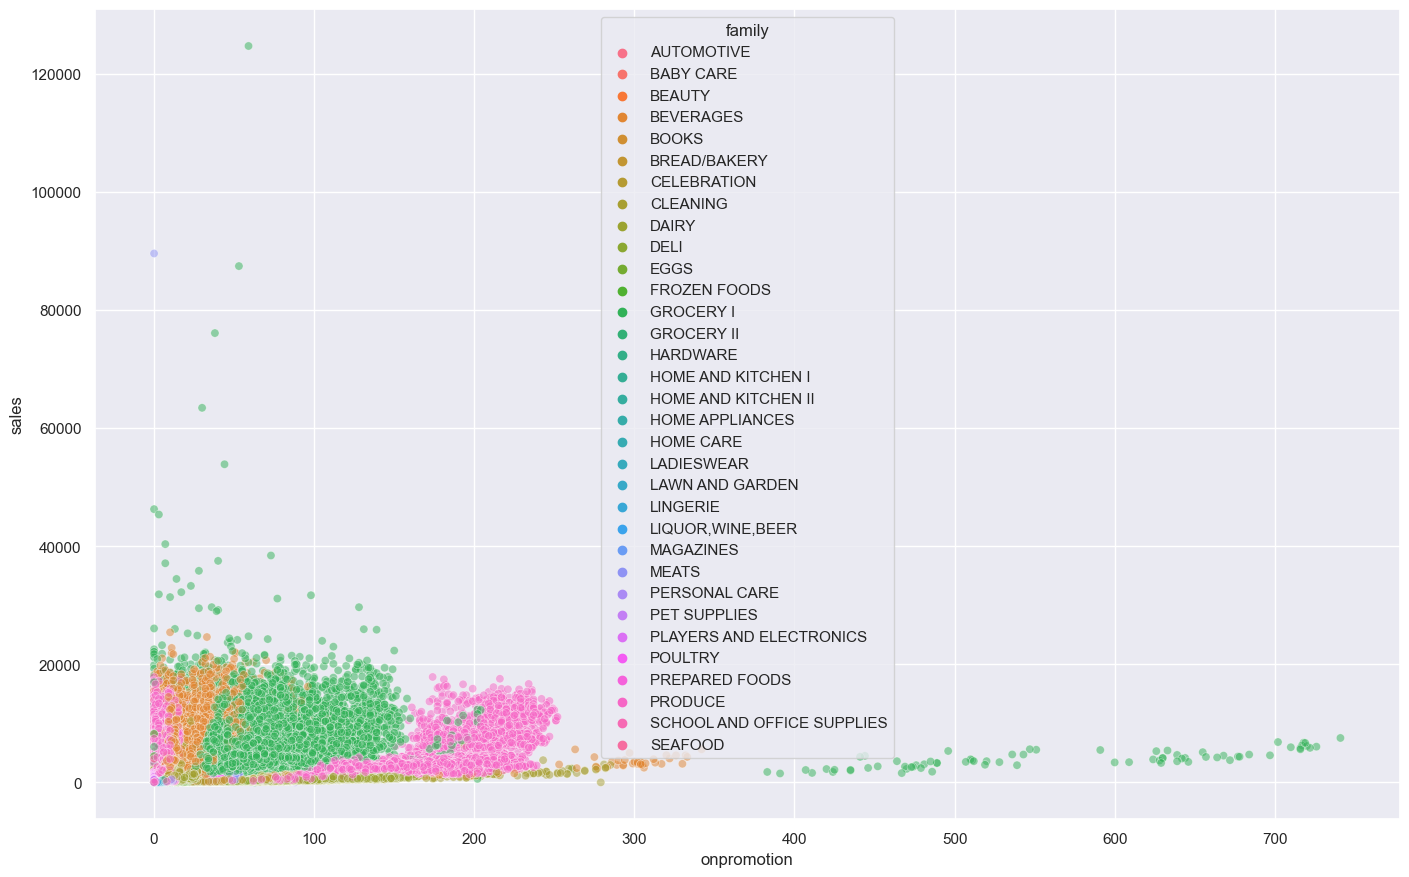

In [77]:
# create a scatter plot of sales against onpromotion for each product family
sns.scatterplot(data=df_train, x='onpromotion', y='sales', hue='family', alpha=0.5)

- The concentration of most of the colors between 0 and 200 on the onpromotion axis and between 0 and 20000 on the sales axis suggests that most of the product families have relatively low levels of on-promotion products and low sales. 
- However, there are a few product families that have higher levels of on-promotion products and higher sales, which are represented by the darker colors on the heatmap. 
- The distribution of on-promotion and sales values across product families could be explored further with additional analysis, such as calculating summary statistics or creating histograms.

<b>(C) df_train:</b>
A heatmap to visualize the correlation between all the numerical columns in the df_train DataFrame

1. The code below first selects only the numerical columns in the df_train DataFrame using the select_dtypes() method. 
2. We thwn creates correlation matrix using the corr() method, and
3. Finally create a heatmap using sns.heatmap() and displays it using plt.show(). 
4. The cmap parameter is set to 'coolwarm' to use a blue-to-red color scheme, and annot=True is used to display the correlation coefficients on the heatmap.

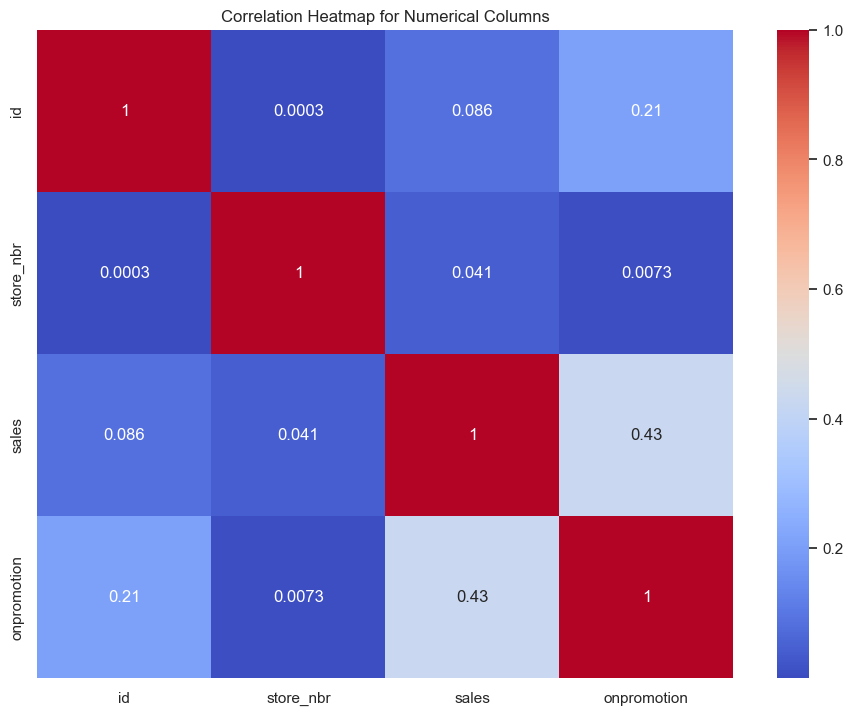

In [78]:
# Select only the numerical columns
num_cols = df_train.select_dtypes(include='number').columns.tolist()

# Create a correlation matrix
corr_matrix = df_train[num_cols].corr()

# Create the heatmap
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

The heatmap shows that there is generally low correlation between the numerical columns in the df_train DataFrame, except for the moderate correlation (0.43) between the sales and onpromotion columns. 

This suggests that the other numerical columns may not be strong predictors of sales and that other factors, such as seasonality or external events, may be driving sales patterns. It also indicates that onpromotion could be a potential factor that affects sales. 

<b>However, it is important to note that correlation does not necessarily imply causation, and further analysis would be needed to determine the true relationship between onpromotion and sales.</b>

### Bivariate analysis to perform on the df_holidays dataframe include:

1. Type of holiday vs count 
    – We can plot a bar chart showing the count of holidays by type to see which type of holiday occurs most frequently.

2. Locale vs count 
    – We can plot a bar chart showing the count of holidays by locale (i.e. Local, Regional, National) to see which locale has the most holidays.

3. Transferred vs count 
    – We can plot a bar chart showing the count of holidays by whether they were transferred or not to see how many holidays were moved.

In [79]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


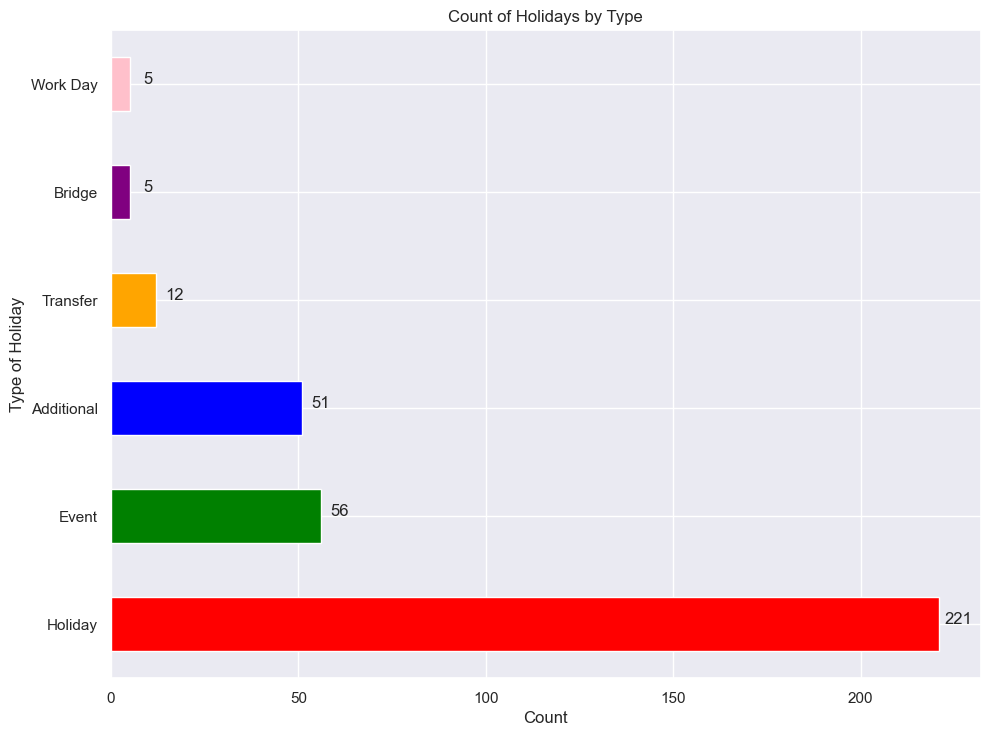

<Figure size 600x400 with 0 Axes>

In [80]:
# 1. Type of holiday vs count
holiday_count = df_holidays['type'].value_counts()
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
ax = holiday_count.plot(kind='barh', color=colors)
plt.title('Count of Holidays by Type')
plt.xlabel('Count')
plt.ylabel('Type of Holiday')
plt.figure(figsize=(6,4))

# Add text labels on top of each bar
for i, v in holiday_count.reset_index().iterrows():
    ax.text(v.type + 5, i, str(v.type), ha='center')

plt.show()

The Bar plot shows that Holiday 221 holidays followed by Event with 56 and Work Day and Bridge the least with only 5 holidays.

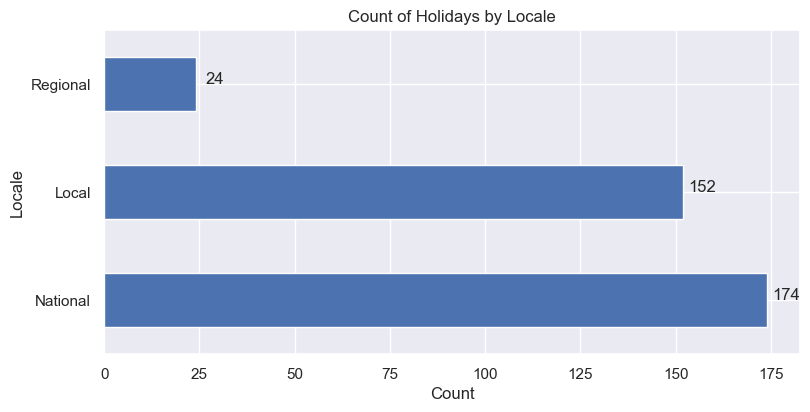

In [81]:
# 2. Locale vs count
locale_count = df_holidays['locale'].value_counts()
ax = locale_count.plot(kind='barh', figsize=(8, 4))
plt.title('Count of Holidays by Locale')
plt.xlabel('Count')
plt.ylabel('Locale')

# Add text labels on top of each bar
for i, v in locale_count.reset_index().iterrows():
    ax.text(v.locale + 5, i, str(v.locale), ha='center')

plt.show()

National holidays had the highest number of 174, followed by Local with 152 and Regional having 24.

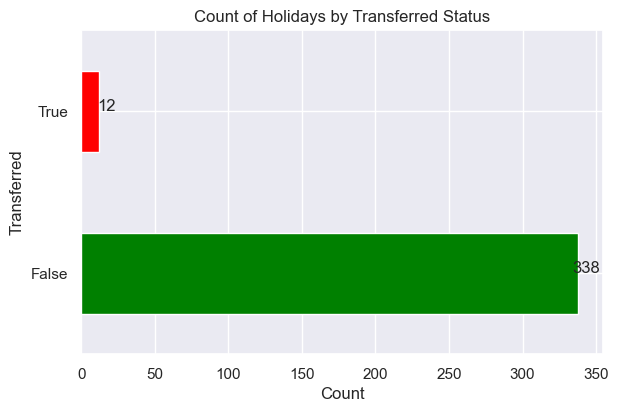

In [82]:
# 3. Count the number of holidays that were transferred or not
transferred_count = df_holidays['transferred'].value_counts()

ax = transferred_count.plot(kind='barh', color=['green', 'red'], figsize=(6, 4))
plt.title('Count of Holidays by Transferred Status')
plt.xlabel('Count')
plt.ylabel('Transferred')

# Add text labels on top of each bar
for i, v in transferred_count.reset_index().iterrows():
    ax.text(v.transferred + 5, i, str(v.transferred), ha='center')

plt.show()

Only 12 holidays were transfered to different dates.

### Multivariate analysis we shall perform on the df_holidays dataframe include:

1. Type of holiday and locale vs count 
    – We create a pivot table showing the count of holidays by both the type of holiday and the locale to see which type of holiday occurs most frequently in each locale.

2. Type of holiday and transferred vs count 
    – We create a pivot table showing the count of holidays by both the type of holiday and whether it was transferred or not to see which type of holiday was more likely to be moved.

3. Type of holiday and locale vs description 
    – We create a pivot table showing the description of each holiday by both the type of holiday and the locale to see what specific events occur most frequently in each locale and for each type of holiday.

In [83]:
# 1. Create a pivot table of holiday counts by type and locale
pivot_table = pd.pivot_table(df_holidays, values='date', index=['type'], columns=['locale'], aggfunc='count')

# Print the pivot table
print(pivot_table)

locale      Local  National  Regional
type                                 
Additional   11.0      40.0       NaN
Bridge        NaN       5.0       NaN
Event         NaN      56.0       NaN
Holiday     137.0      60.0      24.0
Transfer      4.0       8.0       NaN
Work Day      NaN       5.0       NaN


We can visualize the above output from the pivot table by using a stacked bar chart as shown below:

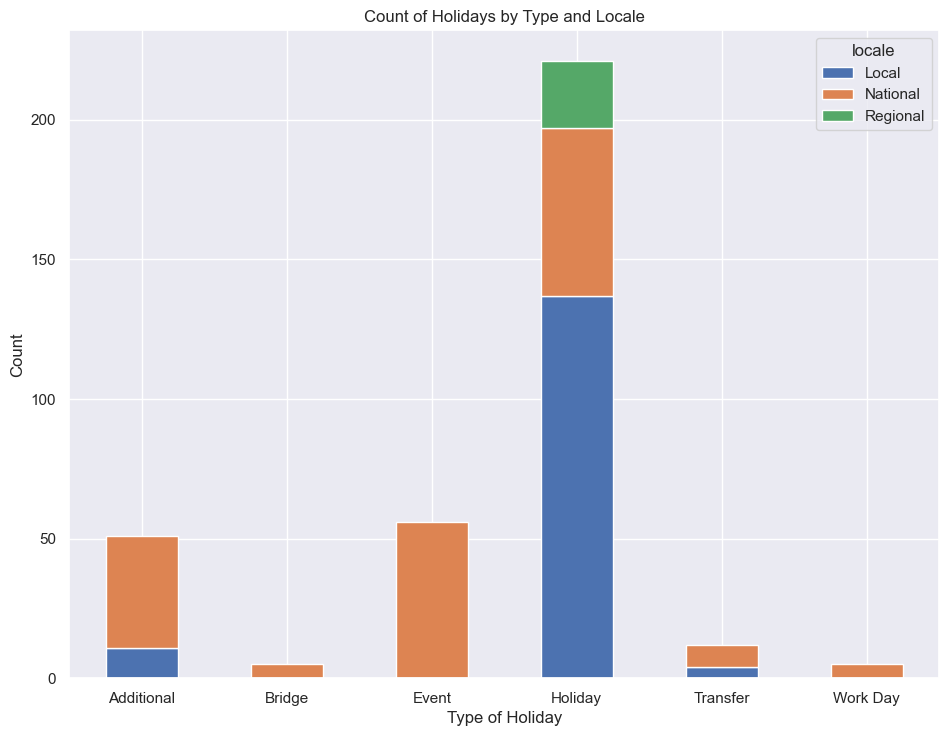

In [84]:
# Create a stacked bar chart of holiday counts by type and locale
pivot_table.plot(kind='bar', stacked=True)
plt.title('Count of Holidays by Type and Locale')
plt.xlabel('Type of Holiday')
plt.ylabel('Count')
# adjust x-axis labels rotation
plt.xticks(rotation=0)
plt.show()

The plot shows a stacked bar chart of the count of holidays by both the type of holiday and the locale.

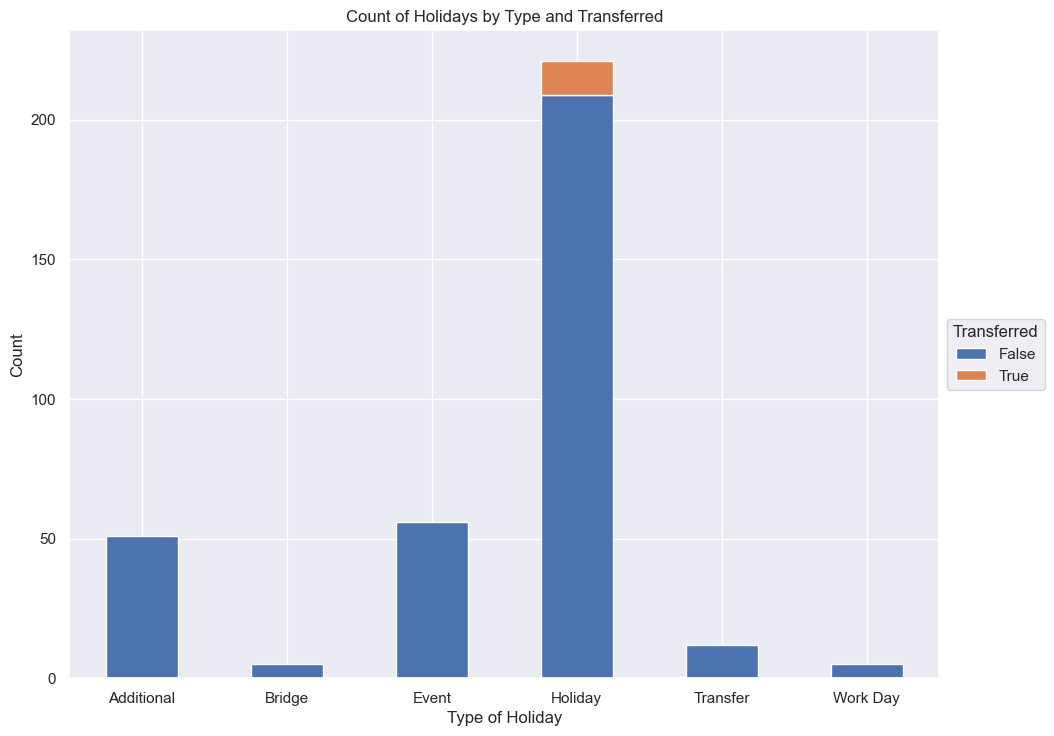

In [85]:
# create a pivot table of count of holidays by type and transferred columns
pivot_df = pd.pivot_table(df_holidays, values='date', index='type', columns='transferred', aggfunc='count', fill_value=0)

# create a bar chart to visualize the pivot table
ax = pivot_df.plot(kind='bar', stacked=True)
plt.title('Count of Holidays by Type and Transferred')
plt.xlabel('Type of Holiday')
plt.ylabel('Count')
plt.legend(title='Transferred', loc='center left', bbox_to_anchor=(1, 0.5))

# adjust x-axis labels rotation
plt.xticks(rotation=0)

plt.show()

From the bar graph it is clear that only the Holiday type had a total of 12 holidays transferred (as witnessed in earlier visualizations).

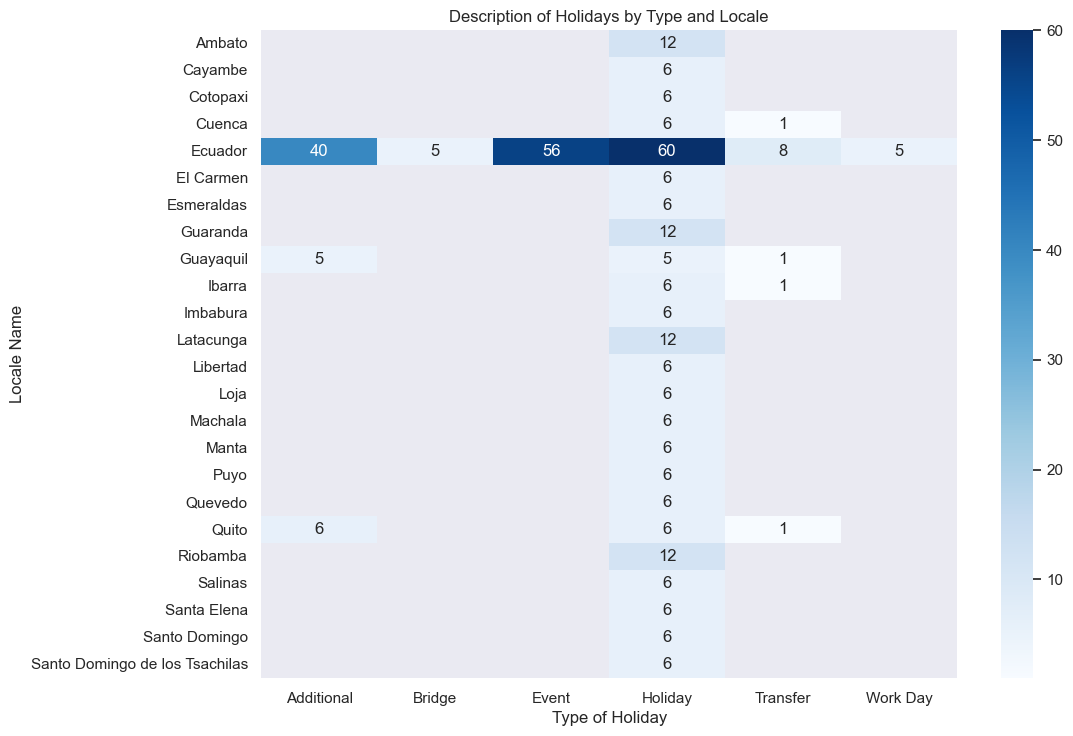

In [86]:
# Create a pivot table showing the description of each holiday by both the type of holiday and the locale
holiday_desc_pivot = df_holidays.pivot_table(values='description', index='locale_name', columns='type', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(holiday_desc_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Description of Holidays by Type and Locale')
plt.xlabel('Type of Holiday')
plt.ylabel('Locale Name')
plt.show()

- Based on the information from the Heatmap, Ecuador has the highest number of holidays compared to other locales. 
- This is evident from the high number of holidays in all categories. 
- The blue color concentration is due to the high number of holidays in Ecuador, which makes it stand out from the rest of the locales.

### Bivariate analysis to perform on the df_stores dataframe include:
<b>1. Cross-tabulation:</b> 
    - A cross-tabulation shall be performed between two categorical variables 'city' and 'type' of store. This will show how many stores of each type are located in each city.

<b>2. Scatter plot:</b> 
    - A scatter plot shall be created between two numerical variables such as the number of similar stores in that area 'cluster' and the store number 'store_nbr'. This will show if there is any relationship between the two variables.

In [87]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


<b>Cross-tabulation:</b>
- We create a stacked bar chart showing the number of stores of each type in each city. 
- The x-axis will show the cities and the y-axis will show the number of stores. 
- Each bar will be split into segments, with each segment representing the number of stores of a particular type in that city.

In [88]:
# create the crosstab
store_crosstab = pd.crosstab(df_stores['city'], df_stores['type'])

# print the cross-tabulation
print(store_crosstab)

type           A  B  C  D  E
city                        
Ambato         1  0  0  1  0
Babahoyo       0  1  0  0  0
Cayambe        0  1  0  0  0
Cuenca         0  1  0  2  0
Daule          0  0  0  1  0
El Carmen      0  0  1  0  0
Esmeraldas     0  0  0  0  1
Guaranda       0  0  1  0  0
Guayaquil      1  1  2  2  2
Ibarra         0  0  1  0  0
Latacunga      0  0  2  0  0
Libertad       0  0  0  0  1
Loja           0  0  0  1  0
Machala        0  0  1  1  0
Manta          1  0  0  1  0
Playas         0  0  1  0  0
Puyo           0  0  1  0  0
Quevedo        0  0  1  0  0
Quito          6  3  2  7  0
Riobamba       0  0  1  0  0
Salinas        0  0  0  1  0
Santo Domingo  0  1  1  1  0


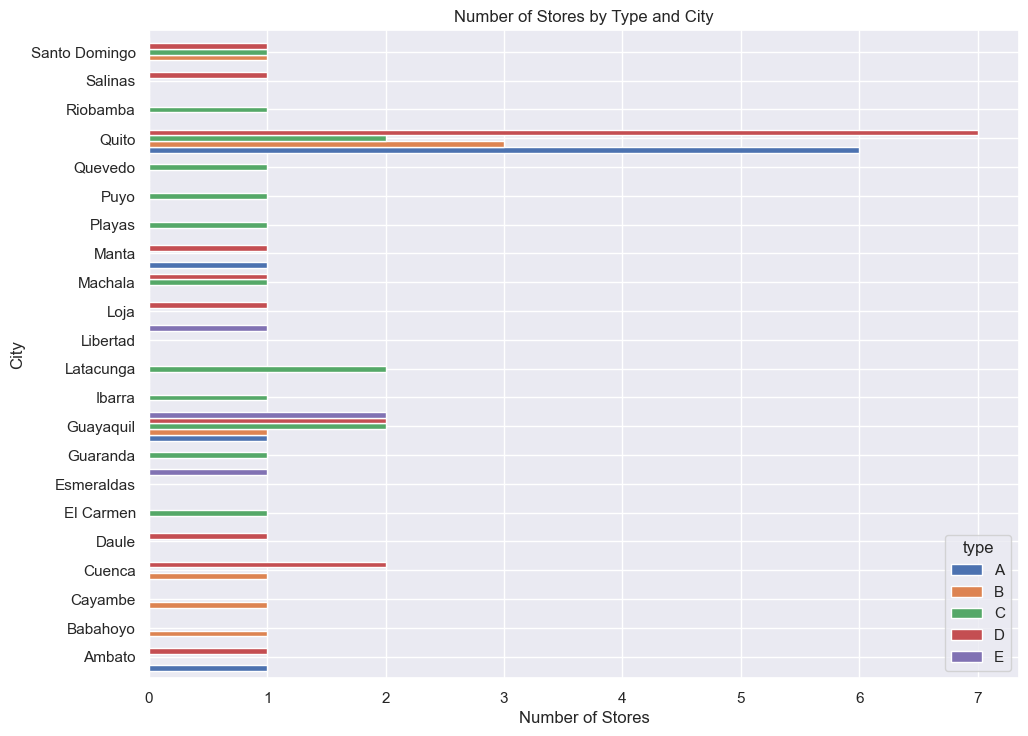

In [89]:
# plot the horizontal bar chart
ax = store_crosstab.plot.barh(figsize=(10, 8), width=1)

# set the title and axis labels
plt.title('Number of Stores by Type and City')
plt.xlabel('Number of Stores')
plt.ylabel('City')

# display the plot
plt.show()

From the bar graph above the stores distribution by Cities is as follows: 
1. <b>Quito</b> has the most number of stores except type E as follows: Type A = 6, Type B = 3, Type C = 2, Type D = 7 and Type E = 0.
2. <b>Guayaquil</b> has all the store types as follows: Type A = 1, Type B = 1, Type C = 2, Type D= 2 and Type E = 2 and,
3. <b>Santo Domingo</b> has three stores as follows: Type B = 1, Type C = 1 and Type D = 1 
4. All other cities have 1 or 2 store types only.

<b>Scatter plot:</b>
- We shall create a scatter plot between two numerical variables 'cluster' and  'store_nbr'.

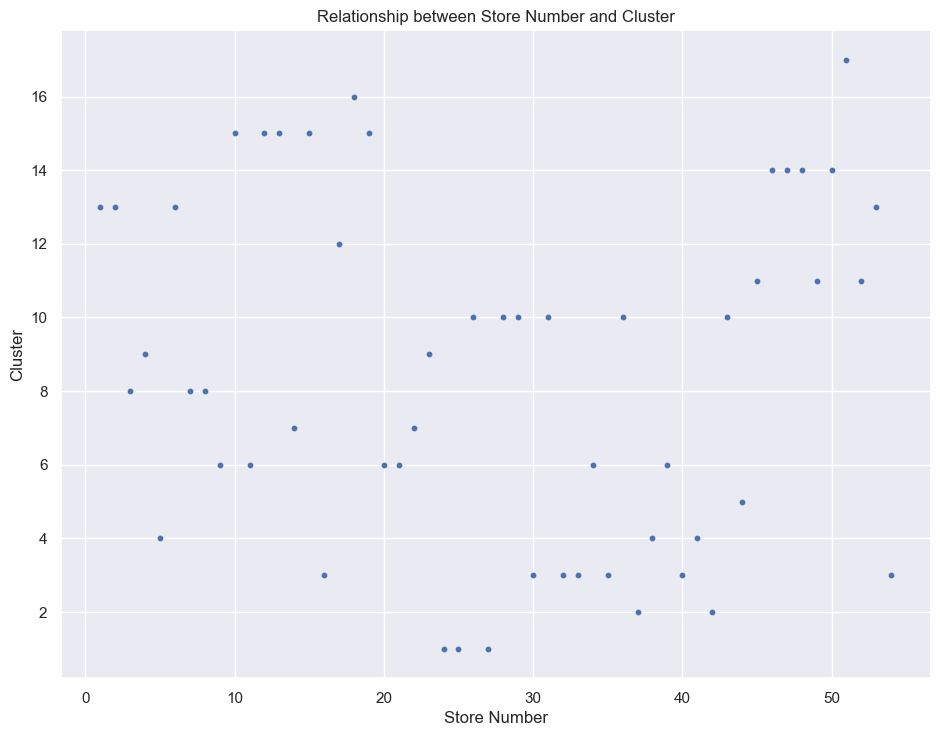

<Figure size 600x400 with 0 Axes>

In [90]:
plt.scatter(df_stores['store_nbr'], df_stores['cluster'], s=10)
plt.title('Relationship between Store Number and Cluster')
plt.xlabel('Store Number')
plt.ylabel('Cluster')
plt.figure(figsize=(6,4))
plt.show()

The points in the scatter plot are scattered all over the graph, an indication that there is no or weak correlation between the two variables. In this case, it is the number of similar stores in that area (cluster) and the store number (store_nbr)

### 5.	Hypothesis and Questions:
- The questions below are to be answered. <b>Note</b> that we are free to draw more hypotheses from the data.
    1. Is the train dataset complete (has all the required dates)?
    2. Which dates have the lowest and highest sales for each year?
    3. Did the earthquake impact sales?
    4. Are certain groups of stores selling more products? (Cluster, city, state, type)
    5. Are sales affected by promotions, oil prices and holidays?
    6. What analysis can we get from the date and its extractable features?
    7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


### Q1. Is the train dataset complete (has all the required dates)?
We check the train dataset's completeness by using the isnull() method to see if there are any missing values in the df train dataset:

In [92]:
df_train = df_train.reset_index()
# df_train DataFrame with a 'date' column
start_date = df_train['date'].min()
end_date = df_train['date'].max()

# create date range with frequency of 1 day
date_range = pd.date_range(start_date, end_date, freq='D')

# check for missing dates
missing_dates = date_range[~date_range.isin(df_train['date'])]
print('Missing Dates:',missing_dates)

Missing Dates: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


- <b>There are missing dates for Christmas days,</b>

- <b>There are no sales information on christmas days</b>

### Q2. Which dates have the lowest and highest sales for each year?
We can categorize the train dataset by year and date, and then calculate the minimum and maximum sales for each year.

1. <b>Add new columns containing the date features to the train data<b>
2. <b>Plot sales over year, months and days<b>

In [94]:
df_train.head()

,date,id,store_nbr,family,sales,onpromotion
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,1,BABY CARE,0.0,0
2,2013-01-01,2,1,BEAUTY,0.0,0
3,2013-01-01,3,1,BEVERAGES,0.0,0
4,2013-01-01,4,1,BOOKS,0.0,0


In [95]:
#Create new columns
df_train_copy["year"]=df_train_copy.index.year
df_train_copy["month"]=df_train_copy.index.month
df_train_copy["weekday"]=df_train_copy.index.day_of_week

In [96]:
df_train_copy.head()

,id,store_nbr,family,sales,onpromotion,year,month,weekday
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,1
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,1
2013-01-01,4,1,BOOKS,0.0,0,2013,1,1


In [97]:
df_train_copy = df_train_copy.reset_index()
# Group by year and find the dates with the lowest and highest sales
sales_by_year = df_train_copy.groupby(df_train_copy['date'].dt.year)['sales'].agg(['min', 'max'])

# Print the results
print(sales_by_year)

      min         max
date                 
2013  0.0   46271.000
2014  0.0   45361.000
2015  0.0   40351.460
2016  0.0  124717.000
2017  0.0   38422.625


<b>Visualizing the result:</b>

Index(['sales_min_2013', 'sales_min_2014', 'sales_min_2015', 'sales_min_2016',
       'sales_min_2017', 'sales_max_2013', 'sales_max_2014', 'sales_max_2015',
       'sales_max_2016', 'sales_max_2017'],
      dtype='object')


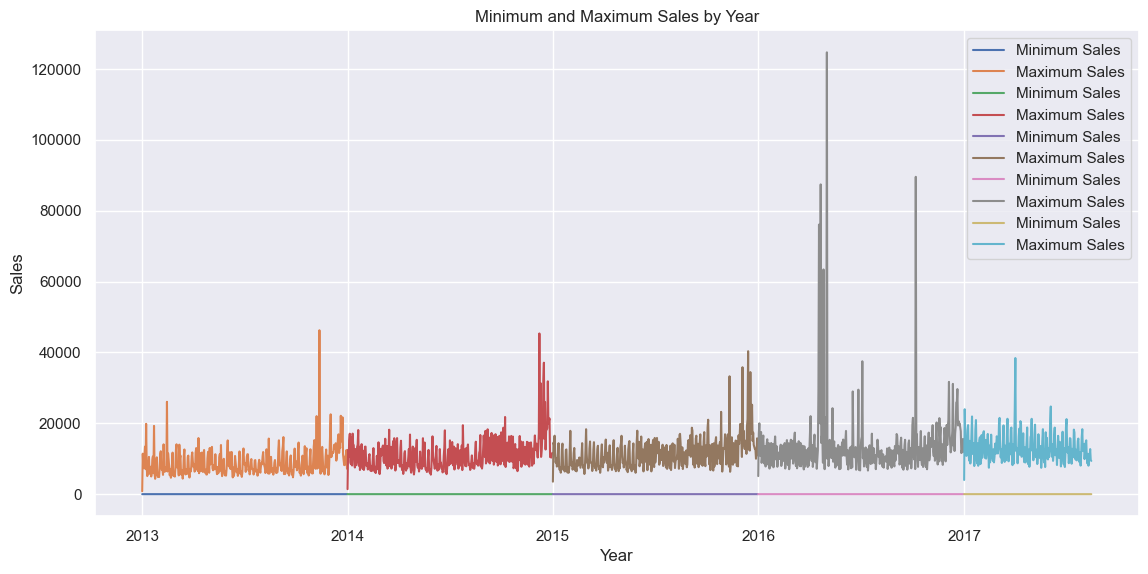

In [98]:
# Convert date column to datetime
df_train_copy['date'] = pd.to_datetime(df_train_copy['date'])

# Group by year and date, calculate min and max sales
sales_by_year = df_train_copy.groupby([df_train_copy['date'].dt.year, 'date']).agg({'sales': ['min', 'max']})

# Unstack the multi-level columns and rename them
sales_by_year = sales_by_year.unstack(level=0)
sales_by_year.columns = ['_'.join(map(str, col)).strip() for col in sales_by_year.columns.values]

# Print columns to check for any changes
print(sales_by_year.columns)

# Set the figure size to 12 inches by 6 inches
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(sales_by_year.index, sales_by_year['sales_min_2013'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2013'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2014'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2014'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2015'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2015'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2016'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2016'], label='Maximum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_min_2017'], label='Minimum Sales')
plt.plot(sales_by_year.index, sales_by_year['sales_max_2017'], label='Maximum Sales')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Minimum and Maximum Sales by Year')
plt.show()


<b>We had Highest Sales in the year 2016 particularly in the 2nd and 3rd Quarter of the year with a maximum of 124,717.<b>

### Visualize  the  months with the highest sales of each year as well.

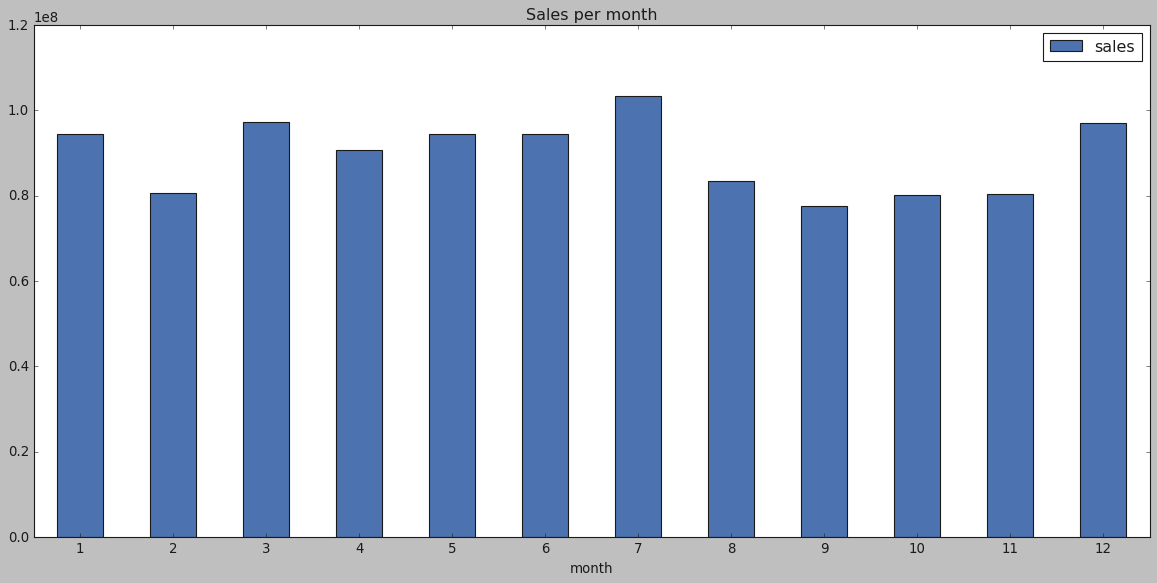

In [125]:
#Create a df and groupby month, agg sales using the sum 
month_grp=df_train_copy.groupby("month",as_index=False)["sales"].sum()

#plot sales for each month
month_grp.plot(kind="bar",x="month",y="sales",figsize=(18,8))
plt.title("Sales per month")

# set x-axis label to upright position
plt.xticks(rotation=0)
plt.show()

<b> Sales tend to be higher in the beginning, middle and end of the year.</b>

### Visualize the Days with the Highest Sales

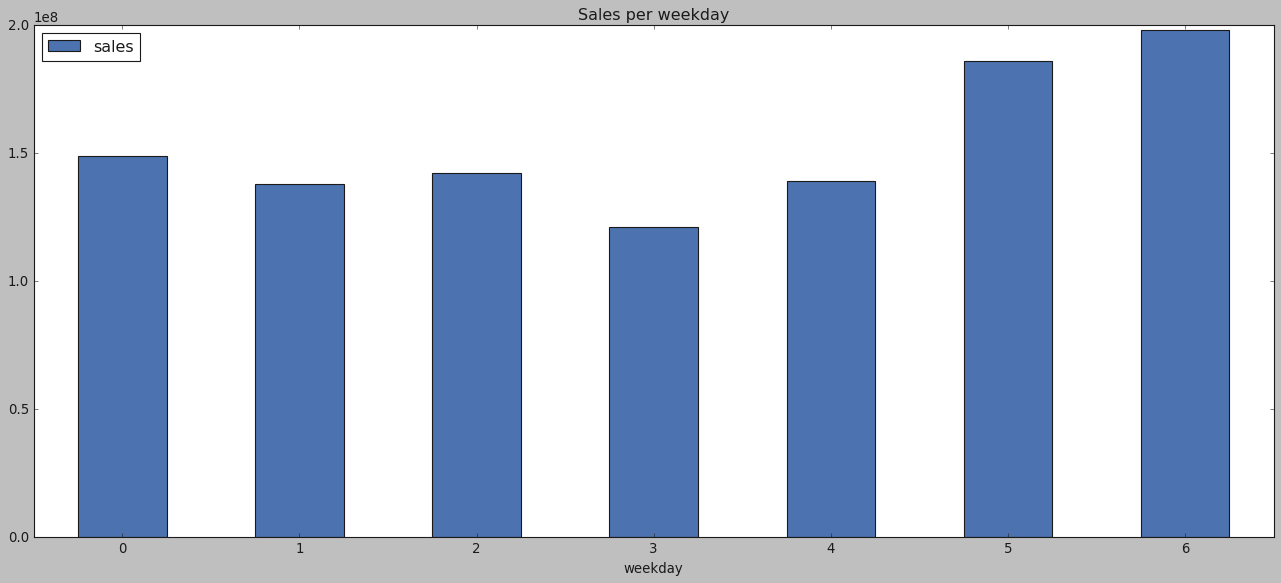

In [124]:
#Create a df and groupby weekday, agg sales using the sum 
day_grp=df_train_copy.groupby("weekday",as_index=False)["sales"].sum()

#plot sales for each day
day_grp.plot(kind="bar",x="weekday",y="sales",figsize=(20,8))
plt.title("Sales per weekday")

# set x-axis label to upright position
plt.xticks(rotation=0)
plt.show()

<b>Sales tend to be higher on Weekends, Saturdays and Sundays and lower in the middle of the week.</b>

### Q3. Did the earthquake impact sales?
- We can compare sales before and after the earthquake to see if the earthquake had an effect on sales. We can do this by calculating the average sales before and after the earthquake and comparing the results.

In [101]:
earthquake_date = pd.to_datetime('2016-04-16')
sales_before_earthquake = df_train[df_train['date'] < earthquake_date]['sales'].mean()
sales_after_earthquake = df_train[df_train['date'] >= earthquake_date]['sales'].mean()

if sales_after_earthquake > sales_before_earthquake:
    print("Sales increased after the earthquake")
elif sales_after_earthquake < sales_before_earthquake:
    print("Sales decreased after the earthquake")
else:
    print("Sales did not change after the earthquake")

Sales increased after the earthquake


### Visualize the impact of Earthquake on Sales

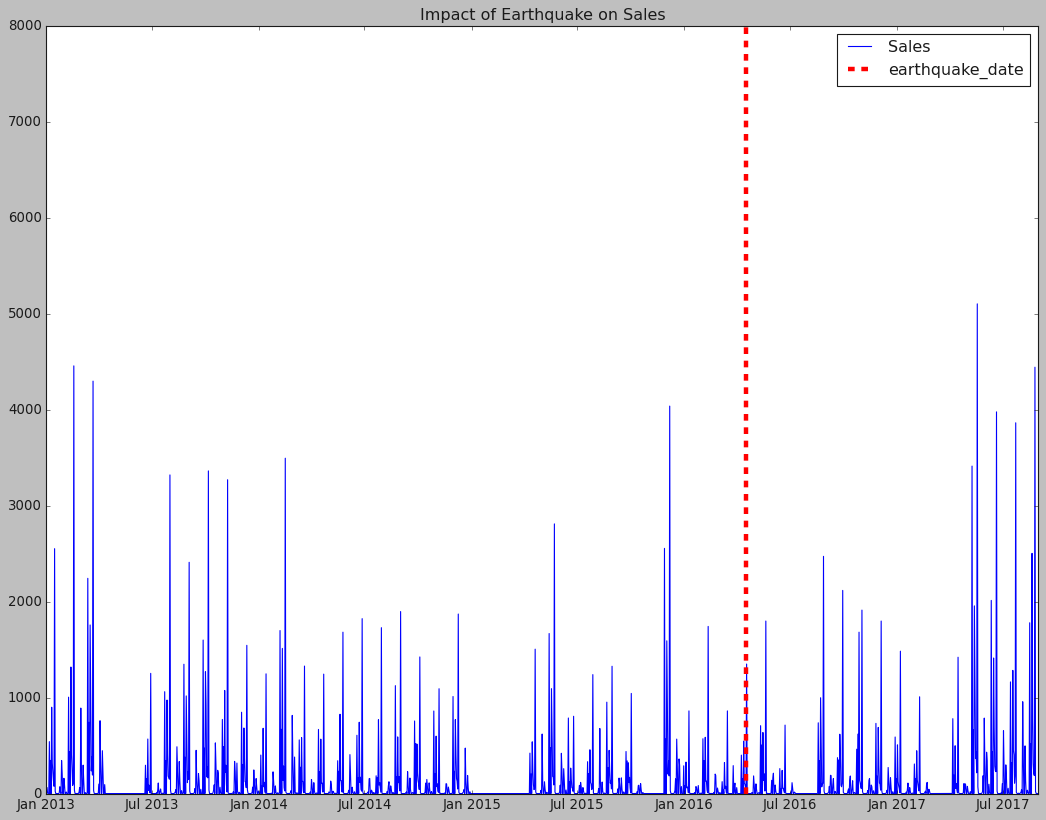

In [102]:
# Convert date column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

#Day of earthquake
earthquake_date=pd.to_datetime('2016-04-16')

#plot sales and earthquake
#set style
plt.style.use("classic")
#plot graph
fig_ax=df_train["sales"].plot(kind="line",figsize=(16,12),color="blue",label="Sales",);
#add vertical line
fig_ax.axvline(earthquake_date,ls="--",color="red",label="earthquake_date", linewidth=4);
#set title and legend
plt.title("Impact of Earthquake on Sales")
plt.legend(loc="best")

# set x-axis limits manually
plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2017-08-31'))
plt.ylim(0, 8000)

plt.show()

It can be seen that there was an increase in sales after Earthquake going by year.

### Visualize Impact of Earthquake on Mean Monthly Sales 

Before we visualize, we shall add columns month, week, and day to the df_train dataframe.

In [103]:
# Print the updated dataframe
print(df_train_copy.head())

        date  id  store_nbr      family  sales  onpromotion  year  month  \
0 2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
1 2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2 2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
3 2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
4 2013-01-01   4          1       BOOKS    0.0            0  2013      1   

   weekday  
0        1  
1        1  
2        1  
3        1  
4        1  


#### Visualizing the impact of Earthquake on sales
1. The code produces a line plot of total weekly sales over time, with a vertical line indicating the earthquake date. 
2. It then computes the mean sales before and after the earthquake and prints a message indicating whether sales increased, decreased, or remained unchanged.

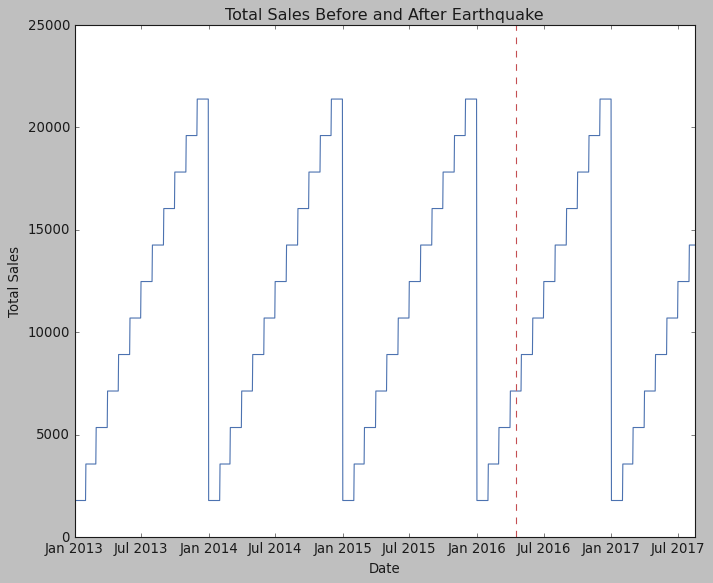

Sales increased after the earthquake


In [104]:
# Group by date and sum the weekly sales
sales_by_date = df_train_copy.groupby('date')['month'].sum()

# Plot the sales by date
plt.figure(figsize=(10,8))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.axvline(x=earthquake_date, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Before and After Earthquake')
plt.show()

# Calculate mean sales before and after earthquake
sales_before_earthquake = df_train_copy[df_train_copy['date'] < earthquake_date]['month'].mean()
sales_after_earthquake = df_train_copy[df_train_copy['date'] >= earthquake_date]['month'].mean()

# Print the results
if sales_after_earthquake > sales_before_earthquake:
    print("Sales increased after the earthquake")
elif sales_after_earthquake < sales_before_earthquake:
    print("Sales decreased after the earthquake")
else:
    print("Sales did not change after the earthquake")

### Q4. Are certain groups of stores selling more products? (Cluster, city, state, type)
- <b>We divide the dataset into groups based on the store nbr, family, or month columns and compute the mean sales for each group. We can then compare the mean sales across different groups to see if certain types of stores sell more products than others.</b>

In [105]:
df_train.head()

,date,id,store_nbr,family,sales,onpromotion
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,1,BABY CARE,0.0,0
2,2013-01-01,2,1,BEAUTY,0.0,0
3,2013-01-01,3,1,BEVERAGES,0.0,0
4,2013-01-01,4,1,BOOKS,0.0,0


<b>The below code generates three bar charts, one for each of the three variables under consideration.</b> 
1. The first chart depicts mean sales by store number, 
2. The second depicts mean sales by product family, and 
3. The third depicts mean sales by month. 

To make it easier to understand what we're looking at, each chart has a title, x-axis label, and y-axis label.

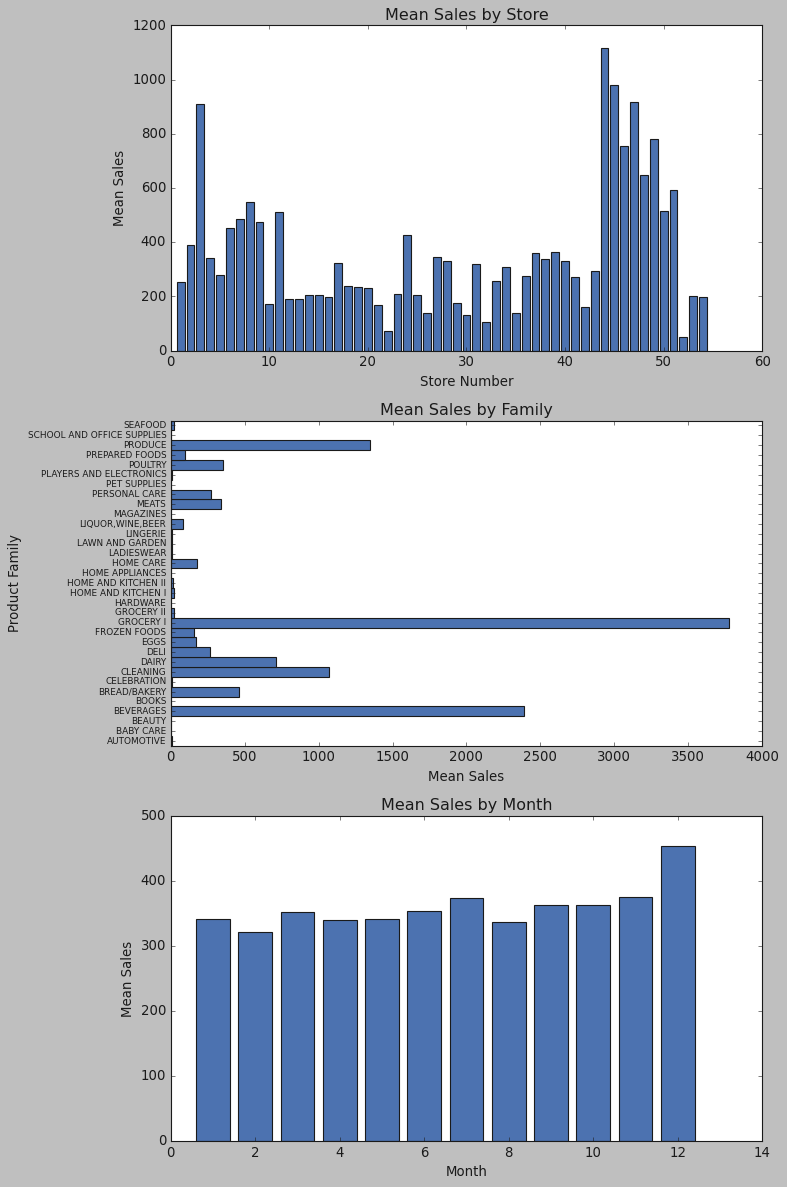

In [106]:
sales_by_store = df_train_copy.groupby('store_nbr').agg({'sales': 'mean'})
sales_by_family = df_train_copy.groupby('family').agg({'sales': 'mean'})
sales_by_month = df_train_copy.groupby('month').agg({'sales': 'mean'})

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot sales by store
axs[0].bar(sales_by_store.index, sales_by_store['sales'])
axs[0].set_xlabel('Store Number')
axs[0].set_ylabel('Mean Sales')
axs[0].set_title('Mean Sales by Store')

# Plot sales by family
axs[1].barh(sales_by_family.index, sales_by_family['sales'], height=1.0)
axs[1].set_xlabel('Mean Sales')
axs[1].set_ylabel('Product Family')
axs[1].set_title('Mean Sales by Family')
axs[1].tick_params(axis='y', labelsize=8)

# Plot sales by month
axs[2].bar(sales_by_month.index, sales_by_month['sales'])
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Mean Sales')
axs[2].set_title('Mean Sales by Month')

# Show the plots
plt.tight_layout()
plt.show()

### Stores with the highest Sales

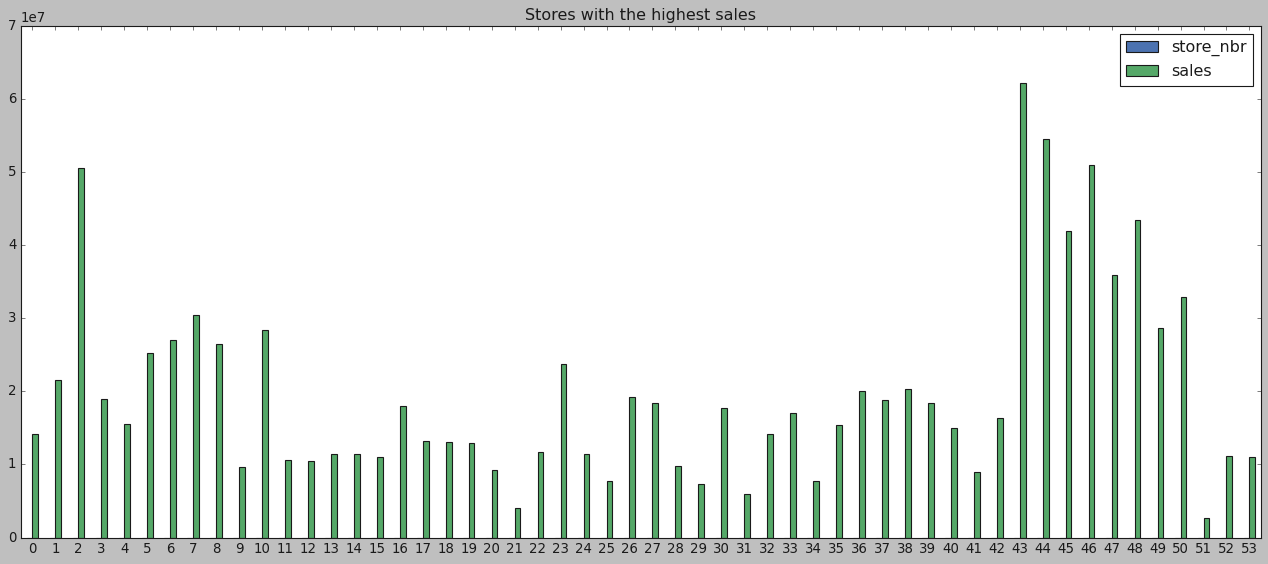

In [107]:
store_grp=df_train.groupby("store_nbr",as_index=False)["sales"].sum()

store_grp.plot(kind="bar",figsize=(20,8),title="Stores with the highest sales");
plt.xticks(rotation=0);

<b>Stores 2, 43, 44 and 46 have the highest sales</b>

### Highest sales by city

In [109]:
# Make a copy of train df and reset index
df=df_train.copy().reset_index()
# Merge store and train datasets on store_nbr
store_train_df=pd.merge(df_train,df_stores,on="store_nbr")
# Group by city
city_grp=store_train_df.groupby("city", as_index=False)["sales"].sum()
# Print top 5 cities
city_grp.sort_values(by="sales",ascending=False,inplace=True)

city_grp.head()

,city,sales
18,Quito,5.567418e+08
8,Guayaquil,1.229673e+08
3,Cuenca,4.916860e+07
0,Ambato,4.030440e+07
21,Santo Domingo,3.583432e+07


<b>The top 5 cities with most sales</b>

### Visualize Top Cities

<AxesSubplot:title={'center':'Top 10 cities with most sales'}, ylabel='city'>

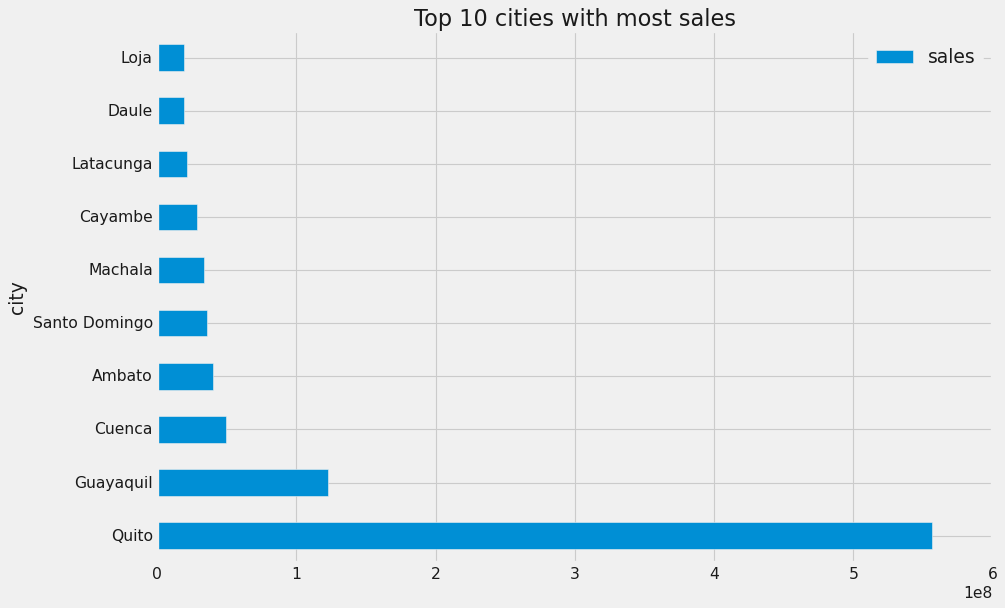

In [110]:
#set style
plt.style.use("fivethirtyeight")
#plot top 10 cities
data=city_grp.head(10)

data.plot("city","sales",kind="barh",title="Top 10 cities with most sales",figsize=(12,8))

<b>The highest sales occurs in Quito, lets check how the stores are distributed in the country</b>

In [111]:
#How are the stores distributed around the country

stores_dist=df_stores.groupby(['city']).count().sort_values(by="store_nbr",ascending=False)
stores_dist.head()

,store_nbr,state,type,cluster
city,,,,
Quito,18,18,18,18
Guayaquil,8,8,8,8
Santo Domingo,3,3,3,3
Cuenca,3,3,3,3
Manta,2,2,2,2


<b>Quito has most store distribution followed by Guayaquil</b>

### Q5. Are sales affected by promotions, oil prices and holidays?

### Sales and Promotions

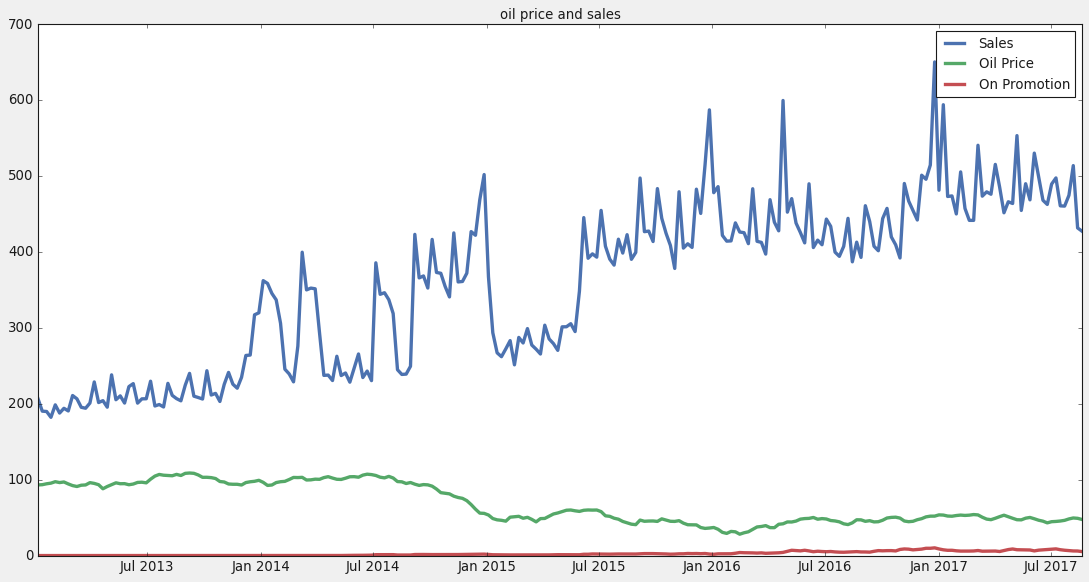

In [112]:
# Make a copy
df_oil_train_copy=df_oil_train.copy()

# Change date to datetime
df_oil_train_copy["date"]=pd.to_datetime(df_oil_train_copy["date"])

# Set date as index
df_oil_train_copy.set_index("date",inplace=True)
#Resample to weekly
df_oil_train_copy=df_oil_train_copy.resample("W").mean()

#plot sales and oil price and on promotion on one graph
plt.figure(figsize=(15,8))
plt.style.use("classic")
plt.plot(df_oil_train_copy["sales"],linewidth=3,label="Sales")
plt.plot(df_oil_train_copy["oil price"],linewidth=3,label="Oil Price")
plt.plot(df_oil_train_copy["onpromotion"],linewidth=3,label="On Promotion")
plt.title("oil price and sales",fontsize=12)
plt.legend(loc="best",fontsize=12)

1. Looking at the graph, we can see that the sales and oil price time series have generally increased from 2013 to mid-2014. 
2. However, there are also fluctuations in the sales time series, particularly in early 2014 and mid-2015. 
3. The on promotion time series is mostly constant, indicating that the number of promotions did not change significantly during this time period.

The graph depicts the relationship between sales and oil prices, revealing that the two time series are somewhat positively correlated. However, because correlation does not imply causation, we cannot conclude that changes in oil prices caused changes in sales without further investigation.

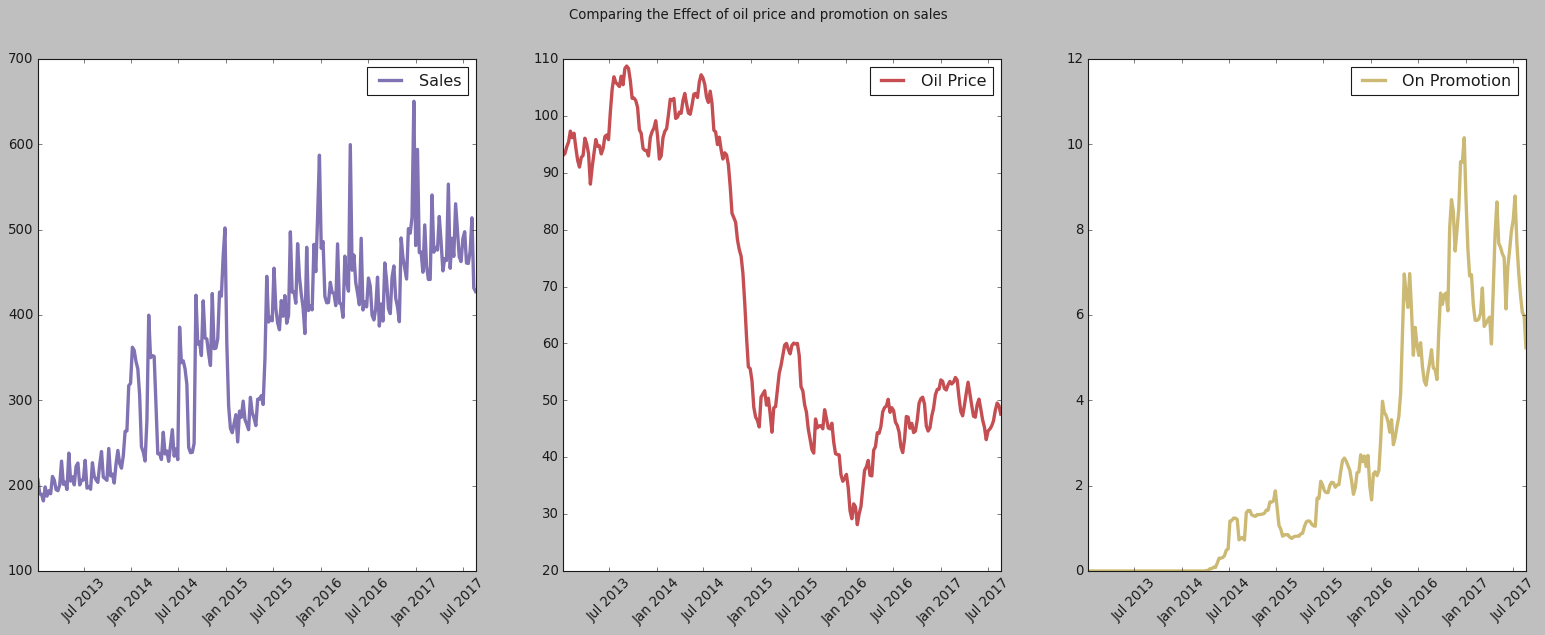

In [119]:
# Create subplots
fig, axs = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(24, 8))

fig.suptitle("Comparing the Effect of oil price and promotion on sales")

axs = axs.ravel()

# Plot individual graphs
axs[0].plot(df_oil_train_copy["sales"], linewidth=3, label="Sales", c="m")
axs[0].legend()

axs[1].plot(df_oil_train_copy["oil price"], linewidth=3, label="Oil Price", c="r")
axs[1].legend()

axs[2].plot(df_oil_train_copy["onpromotion"], linewidth=3, label="On Promotion", c="y")
axs[2].legend()

# Set x-tick label rotation
for ax in axs:
    ax.tick_params(axis='x', labelrotation=45)

plt.show()

#### We can see from the three graphs that:

1. Sales are highly variable, with peaks and valleys that occur over time. However, there appears to be a general upward trend in sales over the course of the period.

2. Oil price: The price of oil fluctuates over time, with high periods followed by low periods.

3. On sale: The number of products on sale varies over time, with some weeks having more sales than others.

4. On promotion: The number of products on promotion varies over time, with some weeks having more promotions than others.

##### When we compare the three graphs, we can see that there are times when sales appear to be correlated with oil prices and promotions, such as around the middle of 2017 and early 2018. This relationship, however, is not always consistent, implying that other factors may also be influencing sales.

### Q6. What analysis can we get from the date and its extractable features?
1. We can extract features such as day of the week, month, and year from the date column and use them as features in our model.

2. We can also create:
    - <b>lag features</b> to capture the sales history of each store and item, 
    - calculate <b>rolling statistics</b>, and 
    - calculate <b>sales and promotional features</b>, as mentioned earlier in the project.

<b>1. Create lag features:</b>
- To create lag features, we can use the pandas shift method. We can shift the transactions column by 1, 2, and 3 days to create 3 lag features.

In [97]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [98]:
df_transactions['transactions_lag7'] = df_transactions.groupby('store_nbr')['transactions'].shift(7)
df_transactions['transactions_lag14'] = df_transactions.groupby('store_nbr')['transactions'].shift(14)
df_transactions['transactions_lag21'] = df_transactions.groupby('store_nbr')['transactions'].shift(21)


### The above code does the following:
1. In df_transactions, this code adds three new columns: transactions lag7, transactions lag14, and transactions lag21. 
2. For each store, these columns contain the transaction values shifted by 7, 14, and 21 days. 
3. Before applying the shift, the groupby method is used to group the transactions by store number. 
4. This ensures that the lag characteristics are calculated independently for each store.

Visualization of the lag features:

In [99]:
for lag in range(7, 22,7):
    df_transactions[f'transactions_lag{lag}'] = df_transactions.groupby('store_nbr')['transactions'].shift(lag)

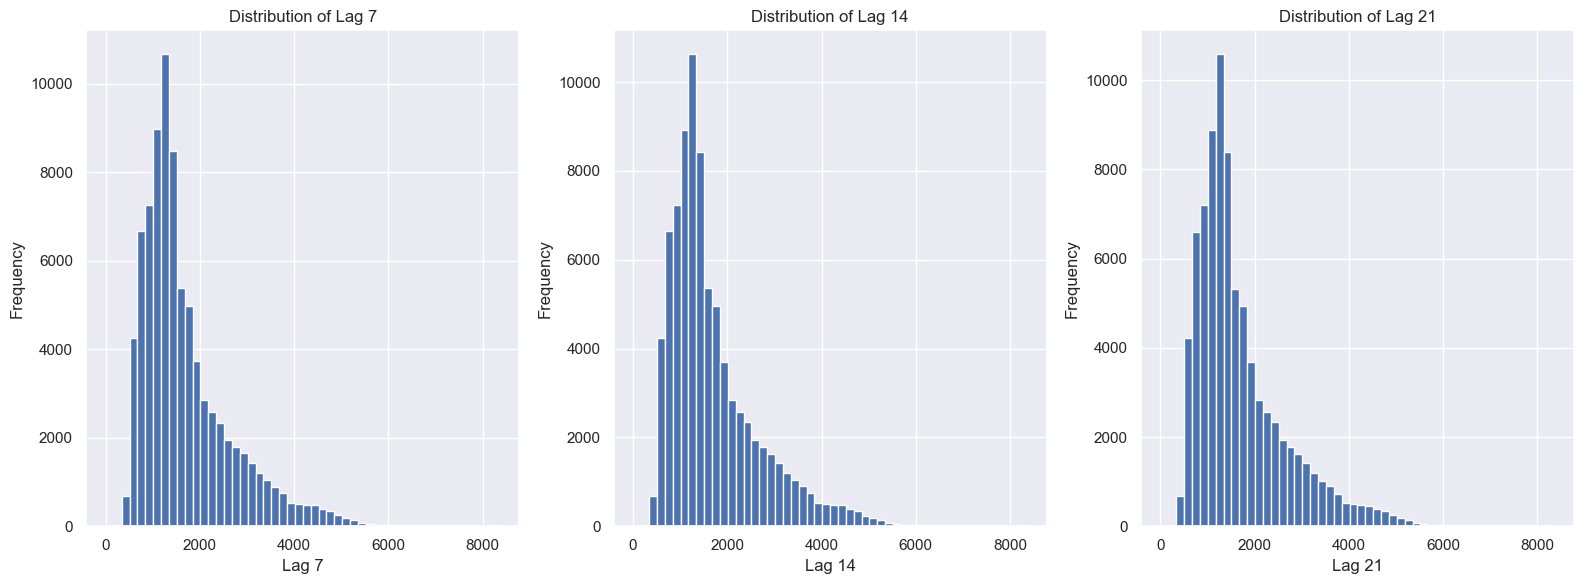

In [100]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axs[0].hist(df_transactions['transactions_lag7'].dropna(), bins=50)
axs[0].set_xlabel('Lag 7')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Lag 7')

axs[1].hist(df_transactions['transactions_lag14'].dropna(), bins=50)
axs[1].set_xlabel('Lag 14')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Lag 14')

axs[2].hist(df_transactions['transactions_lag21'].dropna(), bins=50)
axs[2].set_xlabel('Lag 21')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Lag 21')

plt.tight_layout()
plt.show()

- From the above plots, there are no significant differences between the transaction values for the three different lags, so we can conclude that the transaction data does not exhibit any significant trend or seasonality over a period of 21 days. 
- This could suggest that the transactions are relatively stable over short periods of time, and that longer-term trends or seasonal patterns may be more important to consider when analyzing this data.

<b>It is important to note, however, that this conclusion is solely based on the analysis of three lags, and it may be necessary to examine the data over longer time periods or with different lag intervals to draw more definitive conclusions about the presence or absence of trends or seasonality.</b>

<b>2. Calculate Rolling Statistic (or Moving Average)</b>
- The rolling mean's significance stems from its ability to smooth out short-term fluctuations while highlighting long-term trends in data. 
- The rolling mean provides a more accurate representation of the underlying patterns in the data by calculating the average value of a subset of data points over time. 
- This is especially useful when there is a lot of noise or variability in the data, making it difficult to identify trends.

The code below calculates the rolling mean (Moving Average) and standard deviation for the transactions column of df_transactions, using a window of 7 days:

In [101]:
# convert date column to datetime type
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# set date column as index
df_transactions.set_index('date', inplace=True)

# calculate rolling mean and standard deviation with a window of 7 days
rolling_mean = df_transactions['transactions'].rolling(window=7).mean()
rolling_std = df_transactions['transactions'].rolling(window=7).std()

# add the rolling statistics as new columns in the dataframe
df_transactions['rolling_mean'] = rolling_mean
df_transactions['rolling_std'] = rolling_std

<b>Visualizing the original data vs the Rolling mean</b>

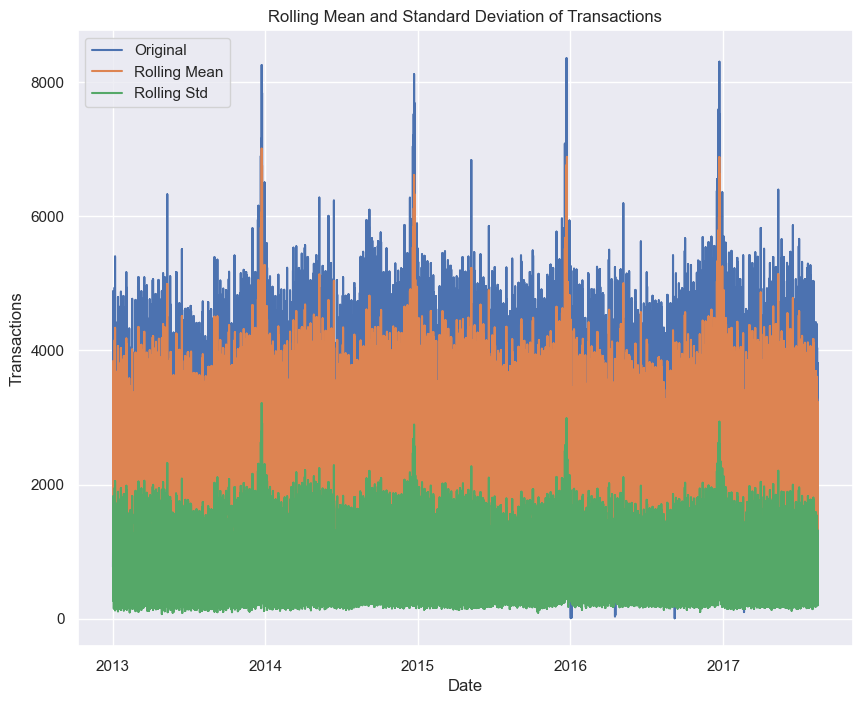

In [102]:
# reset the index to bring 'date' back as a column
df_transactions.reset_index(inplace=True)


# plot the original data
plt.plot(df_transactions['date'], df_transactions['transactions'], label='Original')

# plot the rolling mean
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')

# plot the rolling standard deviation
plt.plot(rolling_std, label='Rolling Std')

# set plot labels and title
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Rolling Mean and Standard Deviation of Transactions')
plt.legend()

# display the plot
plt.show()

1. The above plot shows how the rolling mean has been used to smooth out fluctuations in a time series and highlight trends. 
2. By comparing the rolling mean to the original data, we see whether there are any significant deviations from the trend. 
3. The rolling standard deviation is used to identify periods of high or low volatility in the time series (which can be identified to be happening at the end of every year).

<b>3. calculate sales and promotional features</b>
- To calculate sales and onpromotion features, first we group the data by the relevant columns (e.g., date, store nbr) and 
- Then apply various aggregation functions (e.g., sum, mean, count) to the sales and onpromotion columns using the groupby method as shown below

In [103]:
df_train.head()

,date,id,store_nbr,family,sales,onpromotion,month,week,day
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,1,1,1
1,2013-01-01,1,1,BABY CARE,0.0,0,1,1,1
2,2013-01-01,2,1,BEAUTY,0.0,0,1,1,1
3,2013-01-01,3,1,BEVERAGES,0.0,0,1,1,1
4,2013-01-01,4,1,BOOKS,0.0,0,1,1,1


In [104]:
# Group by date and store_nbr, and calculate the sum of sales and the count of onpromotion
sales_onpromotion = df_train.groupby(['date', 'store_nbr']).agg({'sales': 'sum', 'onpromotion': 'count'})

# Rename the columns to reflect the aggregated features
sales_onpromotion = sales_onpromotion.rename(columns={'sales': 'total_sales', 'onpromotion': 'promo_count'})

# Print the resulting dataframe
print(sales_onpromotion)


                       total_sales  promo_count
date       store_nbr                           
2013-01-01 1              0.000000           33
           2              0.000000           33
           3              0.000000           33
           4              0.000000           33
           5              0.000000           33
...                            ...          ...
2017-08-15 50         16879.121004           33
           51         20154.559000           33
           52         18600.046000           33
           53          8208.189000           33
           54         12666.858000           33

[90936 rows x 2 columns]


#### Visualization of sales and promotional features
<b>(a) We use the line plot to visualize sales and promotional featues</b> 

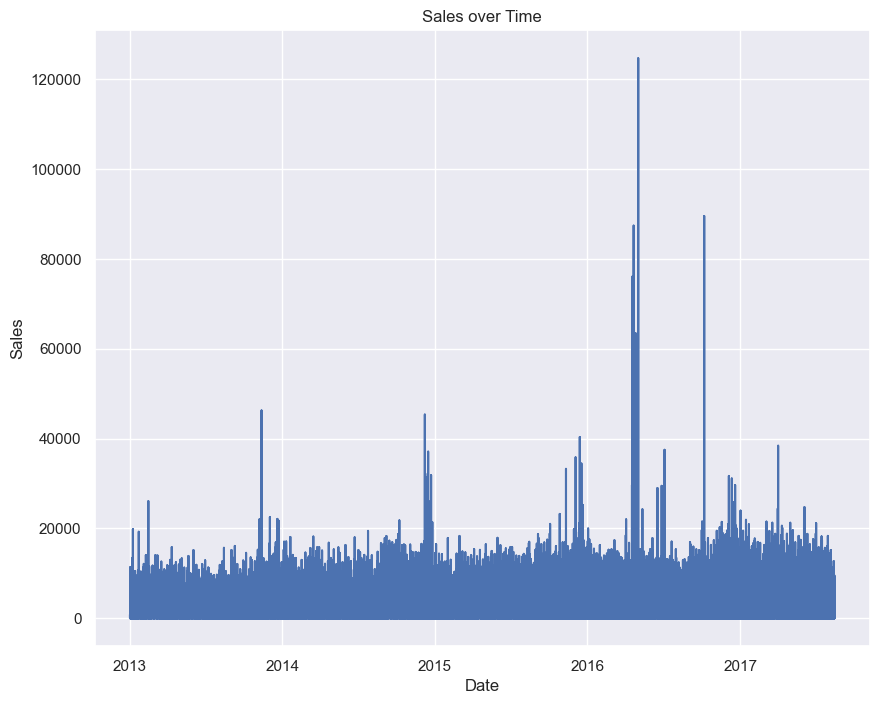

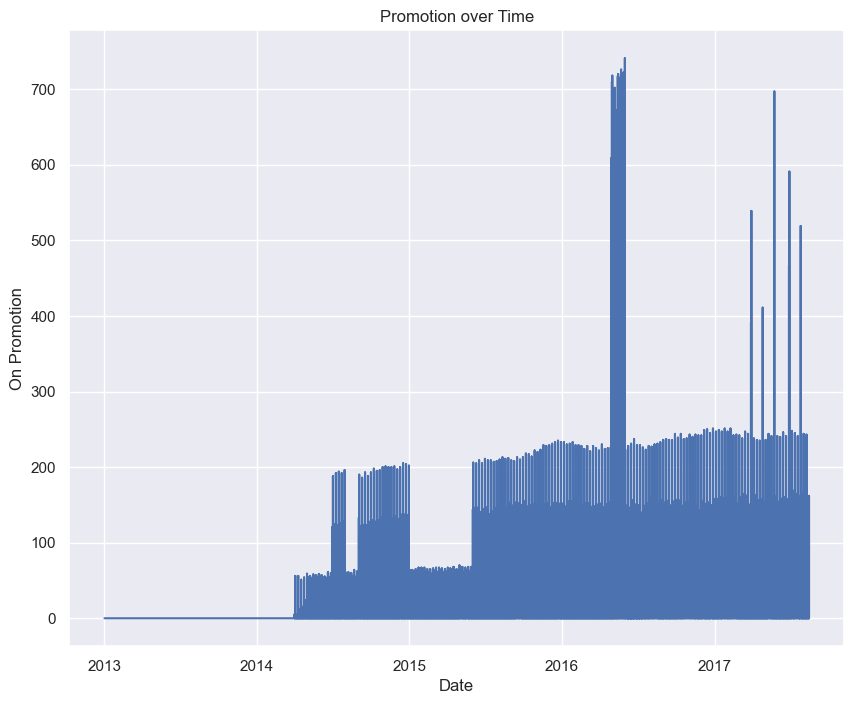

In [105]:
# create a line plot of sales
plt.plot(df_train['date'], df_train['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()

# create a line plot of promotion
plt.plot(df_train['date'], df_train['onpromotion'])
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('Promotion over Time')
plt.show()


From the above plot, it can be observed that there were high sales when the promotions were high, for example, from mid-2015 upto the end of that year and again in mid 2016

<b>(b) Use of Scatter Plot to visualize sales and promotional featues</b>

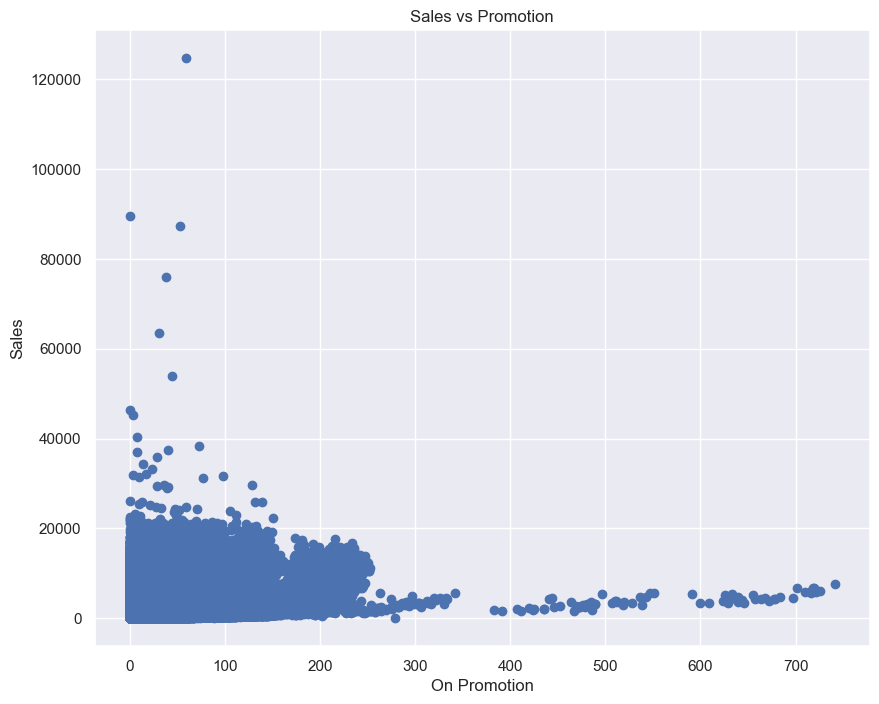

In [106]:
import matplotlib.pyplot as plt

# Extract sales and onpromotion columns
sales = df_train['sales']
promotion = df_train['onpromotion']

# Create scatter plot
plt.scatter(promotion, sales)

# Set plot labels and title
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.title('Sales vs Promotion')

# Show plot
plt.show()


The Scatter Plot indicates that most sales were made when promotions were between 0 and 250. Most promotions did not increase sales significantly.

### Q7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

#### Answers:
The distinction between RMSLE, RMSE, and MSE is in how they penalize prediction errors.

1. MSE (Mean Squared Error) is a common regression metric that measures the average squared difference between predicted and actual values. Because it squares the differences between predicted and actual values, MSE is sensitive to outliers.

2. The square root of MSE is RMSE (Root Mean Squared Error), which is used to interpret the error in the same unit as the target variable. RMSE suffers from the same outlier problem as MSE.

3. The Root Mean Squared Logarithmic Error (RMSLE) metric penalizes under-prediction more than over-prediction. It calculates the root mean square error (RMSE) between the predicted and actual logarithms. RMSLE becomes less sensitive to the magnitude of the target variable and is less affected by outliers as a result.

4. The absolute difference between predicted and actual values is measured by MAE (Mean Absolute Error). Because it does not square the differences between predicted and actual values, MAE is less sensitive to outliers than MSE and RMSE.

5. MAE is greater than all of them because it penalizes prediction errors equally regardless of their direction (over or under prediction), whereas the other metrics (MSE, RMSE, and RMSLE) penalize larger errors more heavily. As a result, MAE is a more lenient metric than the others, and achieving a lower MAE is generally easier than achieving a lower RMSE or RMSLE.

### Hypothesis:

#### Ho:(Null Hypothesis):
- There is NO difference in sales between stores in different types of families.

#### H1: (Alternative Hypothesis:
- There is a difference in sales between stores in different types of families.


We shall compare the average sales of stores in different types of families using an  ANOVA. 
- If there is no significant difference in sales between the different types of families, then we shall fail to reject the null hypothesis. 
- If there is a significant difference in sales, then we may reject the null hypothesis.

#### Test of Hypothesis:
- In this case, we want to see if there is a significant difference in sales between families. The null hypothesis states that there is no difference in sales between stores in various types of families, whereas the alternative hypothesis states that there is a difference in sales between stores in various types of families.

- To run the ANOVA test, we must first sort the data by family and then compute the mean sales for each family. The ANOVA test can then be performed using the f oneway function from the scipy.stats module.

In [109]:
import scipy.stats as stats
# Group the data by family and calculate the mean sales for each family
grouped = df_train.groupby('family')['sales'].mean()

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[df_train[df_train['family'] == family]['sales'] for family in df_train['family'].unique()])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 92571.4834604422
p-value: 0.0


#### Results of ANOVA:
- The F-statistic is 92571.48, and the p-value is 0.0, based on the results produced after running ANOVA test. 

<b>We reject the null hypothesis because the p-value is less than the chosen significance level (usually 0.05) and conclude that there is a statistically significant difference in sales between stores in different types of families.</b>

#### Visualize the Hypothesis Test:
We shall use the ANOVA output for the hypothesis test using a boxplot. 

- A boxplot shall show the distribution of sales for each family type and also show any significant differences between them.

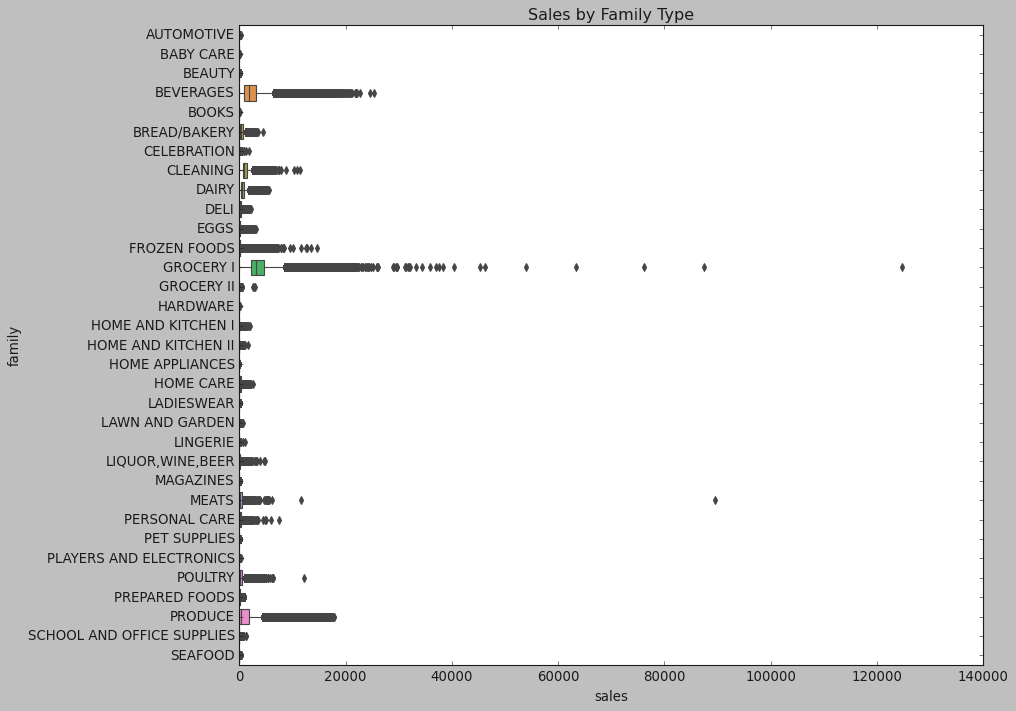

In [123]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a horizontal boxplot of sales by family type
sns.boxplot(y="family", x="sales", data=df_train, orient="horizontal")

# Add a title
plt.title("Sales by Family Type")

# Show the plot
plt.show()

<b> It is also evident from the boxplot that there are significant differences in sales between family types.</b>

<b>The boxplot shows each product family, where the x-axis shows the product family and the y-axis shows the sales.</b> 

1. From the box plot we can see the median, quartiles, and the outliers for each product family. 
2. This visualization helps us understand how the sales are distributed across different product families and identify any potential outliers or trends.
3. As can be seen, GROCERY 1 had the highest number of outliers and MEATS had one outlier too far from the other distributions.

### 6.	Data Cleaning: 
- Once initial analysis is completed, identify issues with the data that need to be addressed then clean the data, dealing with missing values, and correcting any inconsistencies in the data.
